In [18]:
#importing all necessary libraries
import os,sys,platform,warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn
import seaborn as sb
import sklearn as sk
from copy import deepcopy as copy

#for decision tree
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, TargetEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split

#Tools for data processing
from sklearn.model_selection import train_test_split
from sklearn.utils import validation, parallel, resample
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Tools for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as showMatrix # for Classification

from IPython.display import Image

In [19]:
#confirm and checking platform and sotware versions in software stack
print(f"Python Platform:{platform.platform()}")
print(f"Python {sys.version}")
print(f"PyTorch Version: ", torch.__version__)
print(f"Pandas Version: " , pd.__version__)
print(f"SkLearn Version: " , sk. __version__)

Python Platform:macOS-14.0-arm64-arm-64bit
Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:41:52) [Clang 15.0.7 ]
PyTorch Version:  2.1.1
Pandas Version:  2.1.4
SkLearn Version:  1.3.0


In [20]:
#checking devices available,though I know this is unfortunately not usable here, I always include it in my code 
#So I can know what the run can "see"

available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
# print the names
for i in available_gpus:
    print(torch.cuda.get_device_properties(i).name)

# Prints 'Tesla V100-SXM2-16GB', for example
print(torch.version.cuda)
device = torch.device('cuda' if torch.cuda.is_available() or torch.backends.mps.is_available() else 'cpu')
print("Using device: ", device)

None
Using device:  cuda


In [21]:
#Make sure we're pointing at the right directory in relation to where we are.
print(os.getcwd())

#Import data and separate out
whitewinedataraw = pd.read_csv("winequality-white.csv",sep=';')
redwinedataraw = pd.read_csv("winequality-red.csv", sep=';')

#view raw data, get info about it, clean if necessary
whitewinedataraw.info() #information about range
whitewinedataraw.describe() #Description of features
whitewinedataraw.duplicated() #Do we have any duplicate values in our data?
cat_col = [col for col in whitewinedataraw.columns if whitewinedataraw[col].dtype=='object']
num_col = [col for col in whitewinedataraw.columns if whitewinedataraw[col].dtype!='object']
print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

redwinedataraw.info()
redwinedataraw.describe()
redwinedataraw.duplicated()
cat_col = [col for col in redwinedataraw.columns if redwinedataraw[col].dtype=='object']
num_col = [col for col in redwinedataraw.columns if redwinedataraw[col].dtype!='object']
print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

/Users/lisa/Documents/GitHub/exploratory-data-analysis-lrstafford
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Categorical columns:  []
Numerical columns:  ['fixed acidity

In [22]:
whitewinedata = whitewinedataraw.copy()
whitewinelabels = whitewinedata.pop('quality')
display(whitewinelabels)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is depreca

/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lisa/miniconda3/envs/jupyter/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is depreca

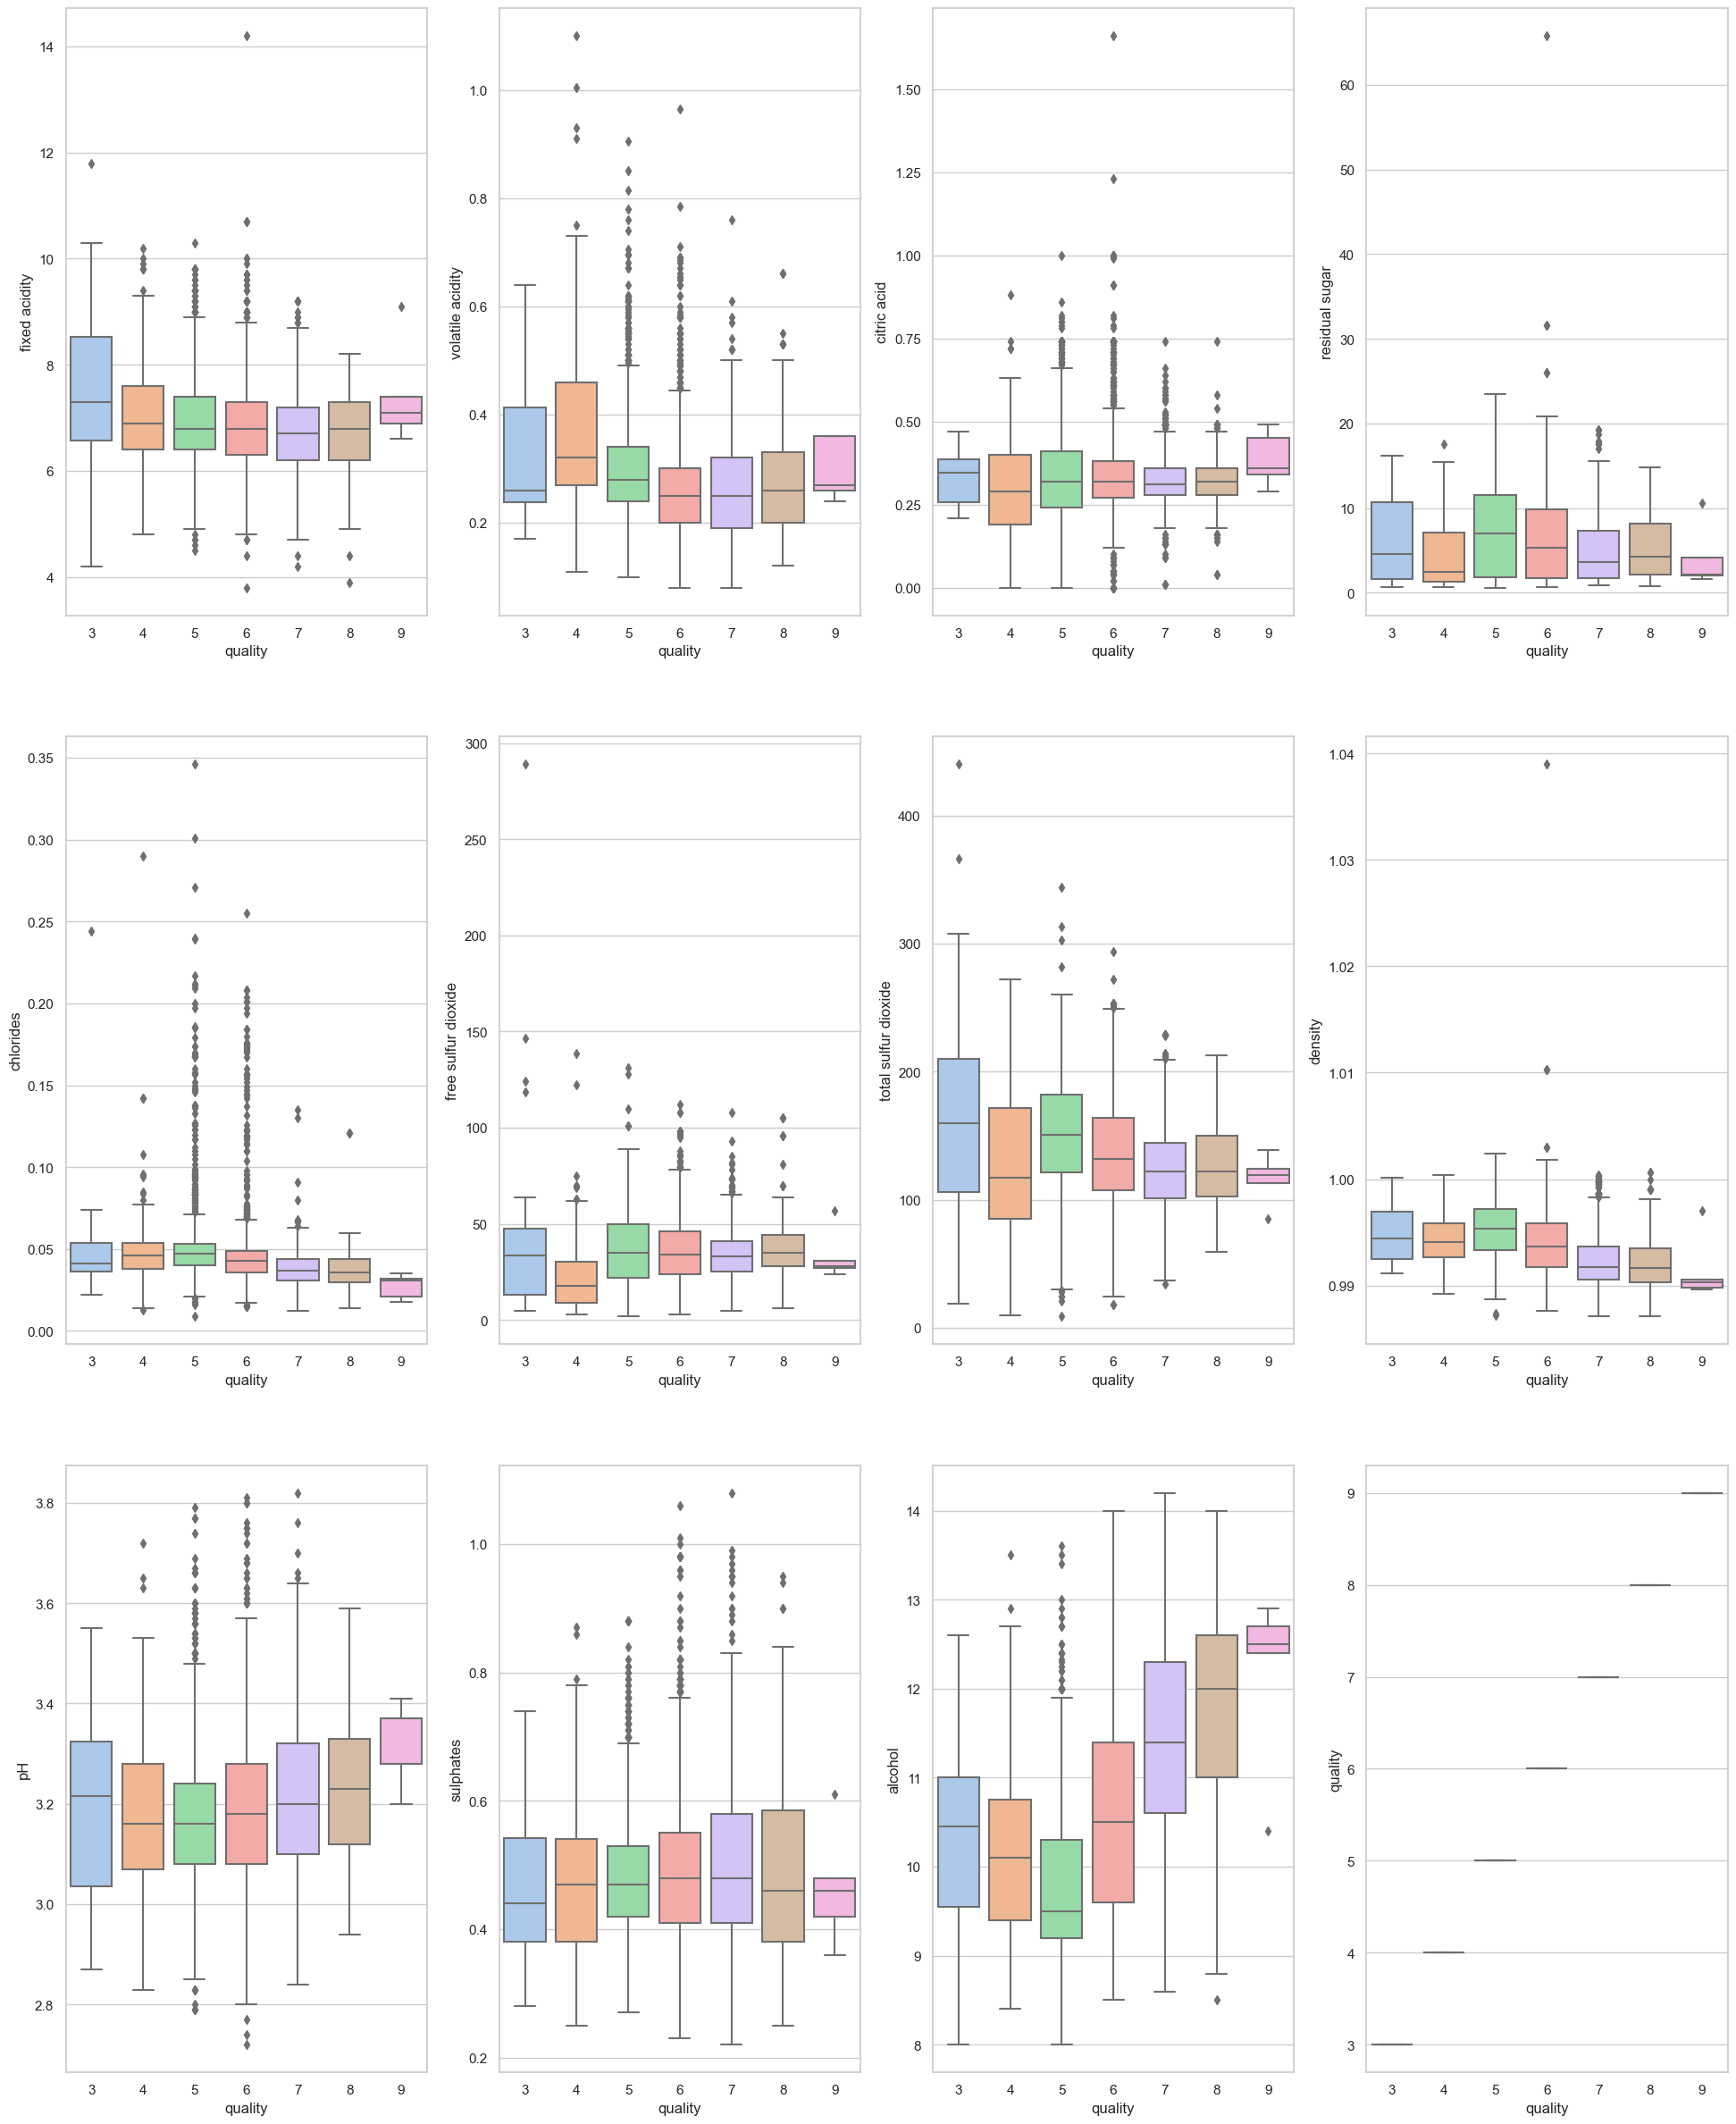

In [23]:
#warnings.filterwarnings("ignore")

#Print out sub box plots for distribution of each feature in a 3x4 grid
sb.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(whitewinedataraw.columns)
for i in range(3):
    for j in range(4):
            sb.boxplot(x=whitewinedataraw['quality'], y=whitewinedataraw[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()


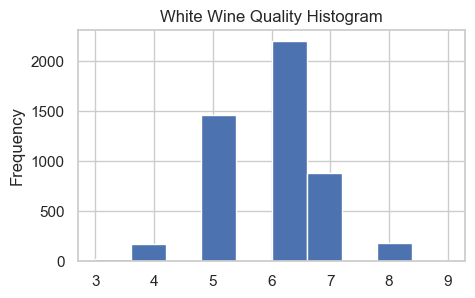

In [24]:
#Show a histogram of the distribution of label data
plot = whitewinelabels.plot(kind='hist', title="White Wine Quality Histogram", figsize=(5,3))

In [25]:
redwinedata = redwinedataraw.copy()
redwinelabels = redwinedata.pop('quality')
display(redwinelabels)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

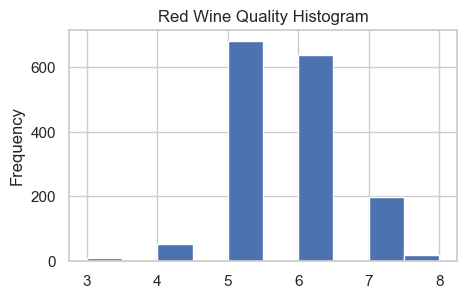

In [26]:
#Show a histogram of the distribution of label data
plot = redwinelabels.plot(kind='hist', title="Red Wine Quality Histogram", figsize=(5,3))

## Exploratory Data Analysis:  
We will attempt to analyze and summarize each dataset, identifying characteristics, patterns and relationships within the data prior to applying any sort machine learning techniques.

### MetaInformation

Prior to performing any analysis on the data we can reference the data repository metadata and data analysis. 

#### Wine Data
Our wine dataset obtained from https://archive.ics.uci.edu/dataset/186/wine+quality provides some information on the data.  

"Two datasets are [provided] related to red and white variants of...wine.  [Additionally] ..."the classes are ordered and [unbalanced] so there are many more normal wines than excellent or poor ones." Both datasets have 11 physiochemical features, no missing values, and a sensory output label ('quality').      

The white wine dataset consists of 4898 total wines while the red wine dataset consists of 1599 total wines.  Data features are consistent with non-null and non-uninterpretable data for both the red and white datasets.  While we are not subject to needing to clean up missing or uninterpretable data values, our data does have some problems worth addressing:  
1. Depending upon the algorithm of our ML model, data may require normalization as none of the features have not been normalized.  
2. Histograms of both Red and White Wine label distribution suggest significantly skewed samples and unbalanced data.  A large majority of all wines are labeled with qualities 5 or 6 but minimal samples are provided for other quality classes 3, 4, 7, 8, and 9.
3. Boxplots for most features except for the citric acid feature contains a lot of outliers.
4. These features also tend to be skewed towards the right. These features include Residual Sugar, Chlorides, Free Sulphur Dioxide, Total Sulphur Dioxide, and Sulphates. Such features may need to be transformed for certain model algorithms by applying transformation to improve classification performance.  



In [30]:
#Define a base training function for reuse
#Uses train_test_split for model evals and use to shuffle our data and randomize what gets parsed to test and train
def trainandeval(winedata, winelabels, winetype):
    X_train, X_test, y_train, y_test = train_test_split(winedata, winelabels, train_size=.8, shuffle=True,random_state=0)

    X_train.shape, X_test.shape

    dtclass = DecisionTreeClassifier()
    dtclass = dtclass.fit(X_train, y_train)

    trainpred = dtclass.predict(X_train)
    testpred = dtclass.predict(X_test)

    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)

    print("Accuracy of Decision Tree on ", winetype, " training is: ", trainacc)
    print("Accuracy of Decision Tree on ", winetype, " test data is: ", testacc)
    
    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
        
    disp = showMatrix(winematrix, display_labels=labels) 
    disp.plot()  
    plt.grid(False)
    plt.show()
    
    return testacc

In [31]:
def iterativetrain(winetype,iters): 
    accuracies=[]
    if winetype == 'white':
        data = whitewinedata
        labels = whitewinelabels
    else:
        data = redwinedata
        labels = redwinelabels
        
    for iterations in range (iters):
        accuracies.append(trainandeval(data, labels, winetype+str(iterations+1)))
    print(accuracies)
    return sum(accuracies)/iters
        
    

Accuracy of Decision Tree on  red1  training is:  1.0
Accuracy of Decision Tree on  red1  test data is:  0.68125


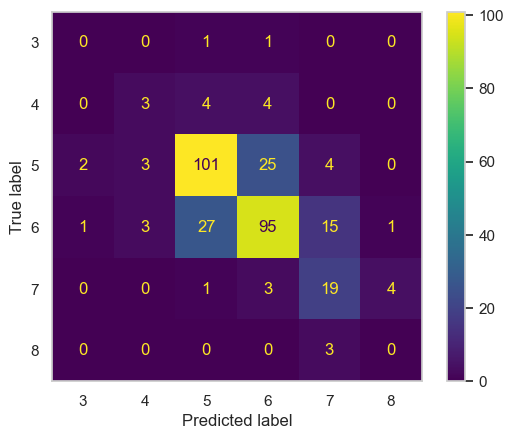

Accuracy of Decision Tree on  red2  training is:  1.0
Accuracy of Decision Tree on  red2  test data is:  0.665625


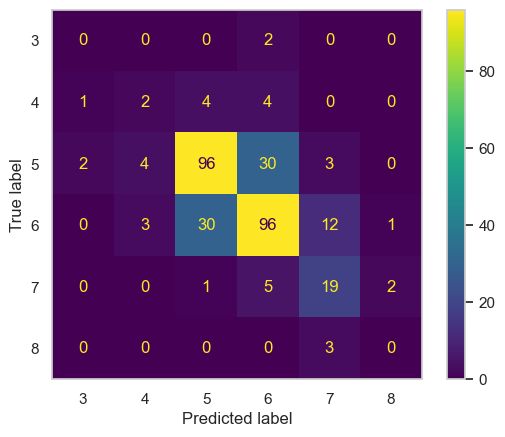

Accuracy of Decision Tree on  red3  training is:  1.0
Accuracy of Decision Tree on  red3  test data is:  0.671875


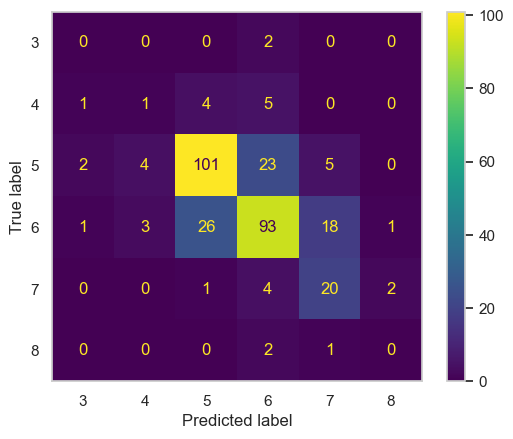

Accuracy of Decision Tree on  red4  training is:  1.0
Accuracy of Decision Tree on  red4  test data is:  0.665625


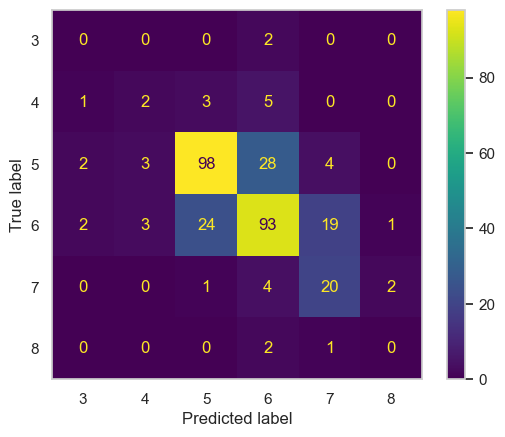

Accuracy of Decision Tree on  red5  training is:  1.0
Accuracy of Decision Tree on  red5  test data is:  0.675


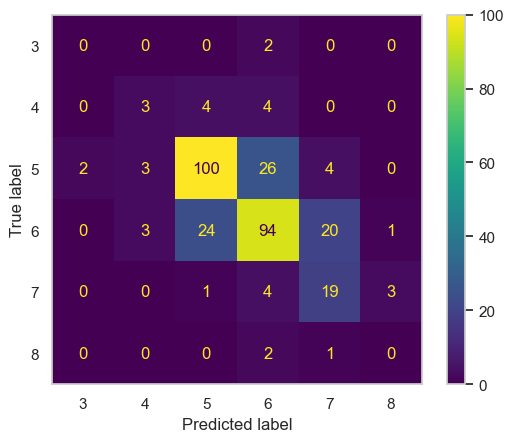

[0.68125, 0.665625, 0.671875, 0.665625, 0.675]
0.671875
Accuracy of Decision Tree on  white1  training is:  1.0
Accuracy of Decision Tree on  white1  test data is:  0.5724489795918367


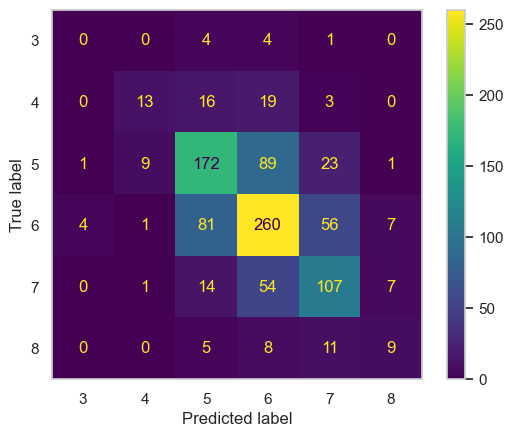

Accuracy of Decision Tree on  white2  training is:  1.0
Accuracy of Decision Tree on  white2  test data is:  0.5785714285714286


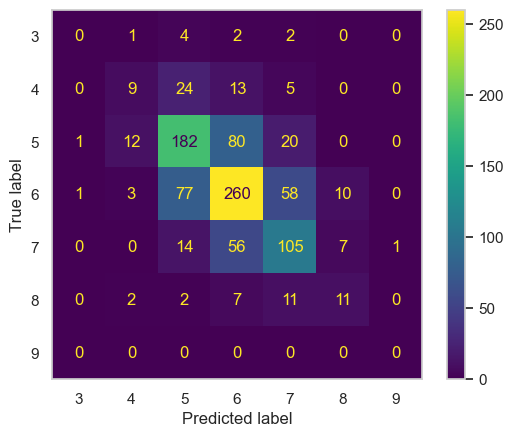

Accuracy of Decision Tree on  white3  training is:  1.0
Accuracy of Decision Tree on  white3  test data is:  0.5795918367346938


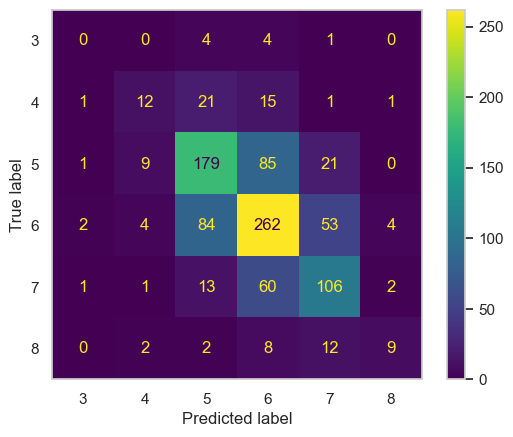

Accuracy of Decision Tree on  white4  training is:  1.0
Accuracy of Decision Tree on  white4  test data is:  0.5744897959183674


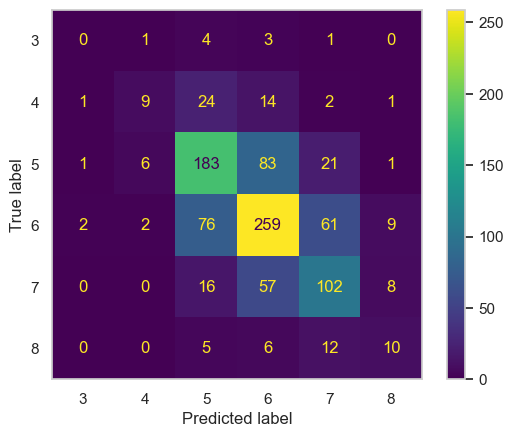

Accuracy of Decision Tree on  white5  training is:  1.0
Accuracy of Decision Tree on  white5  test data is:  0.5755102040816327


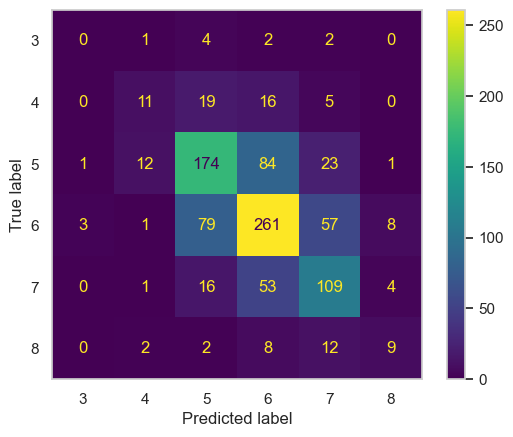

[0.5724489795918367, 0.5785714285714286, 0.5795918367346938, 0.5744897959183674, 0.5755102040816327]
0.5761224489795918


In [32]:
warnings.resetwarnings()

print(iterativetrain('red', 5))
print(iterativetrain('white', 5))

In [33]:
#Get a clean copy of the data
redwinedata = redwinedataraw.copy()
whitewinedata = whitewinedataraw.copy()
redwinelabels = redwinedata.pop('quality')
whitewinelabels = whitewinedata.pop('quality')
normalizedred = pd.DataFrame(normalize(redwinedata),columns=redwinedata.columns)
normalizedwhite = pd.DataFrame(normalize(whitewinedata),columns=whitewinedata.columns)

normalizedred['quality'] = redwinelabels
normalizedwhite['quality'] = whitewinelabels




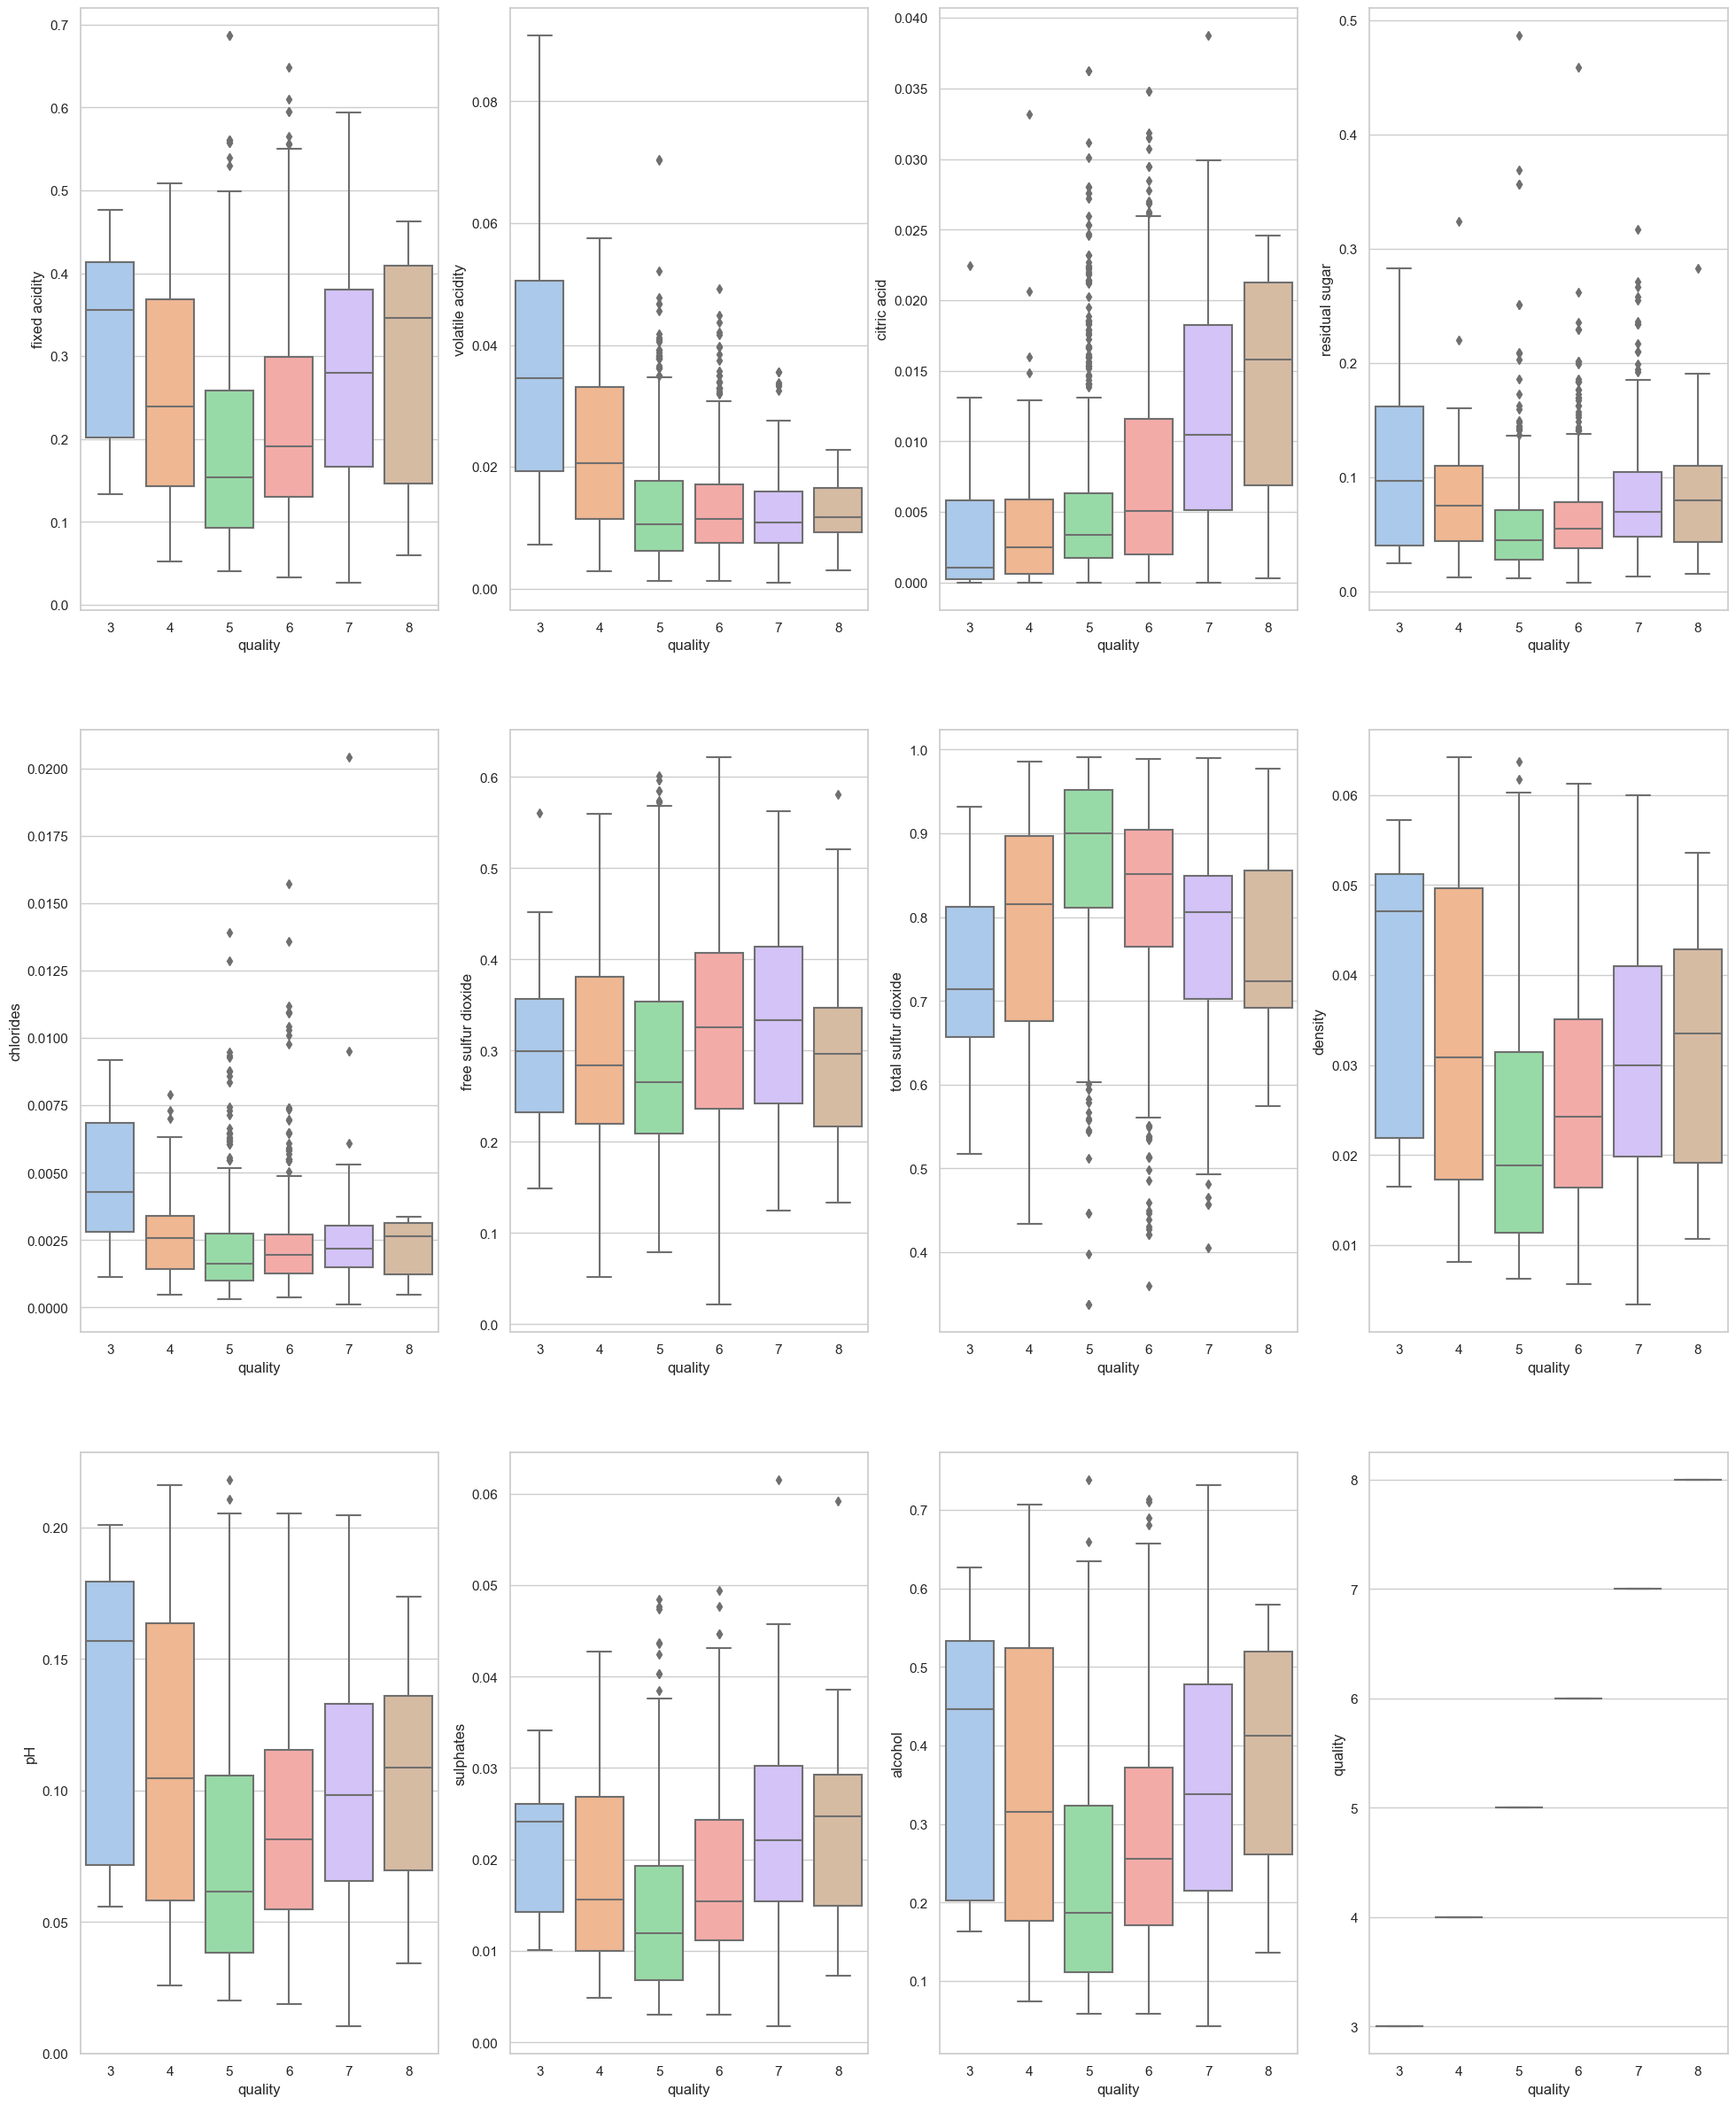

In [34]:
warnings.filterwarnings("ignore")

#Print out sub box plots for distribution of each feature in a 3x4 grid for red wines
sb.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(normalizedred.columns)
for i in range(3):
    for j in range(4):
            sb.boxplot(x=normalizedred['quality'], y=normalizedred[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

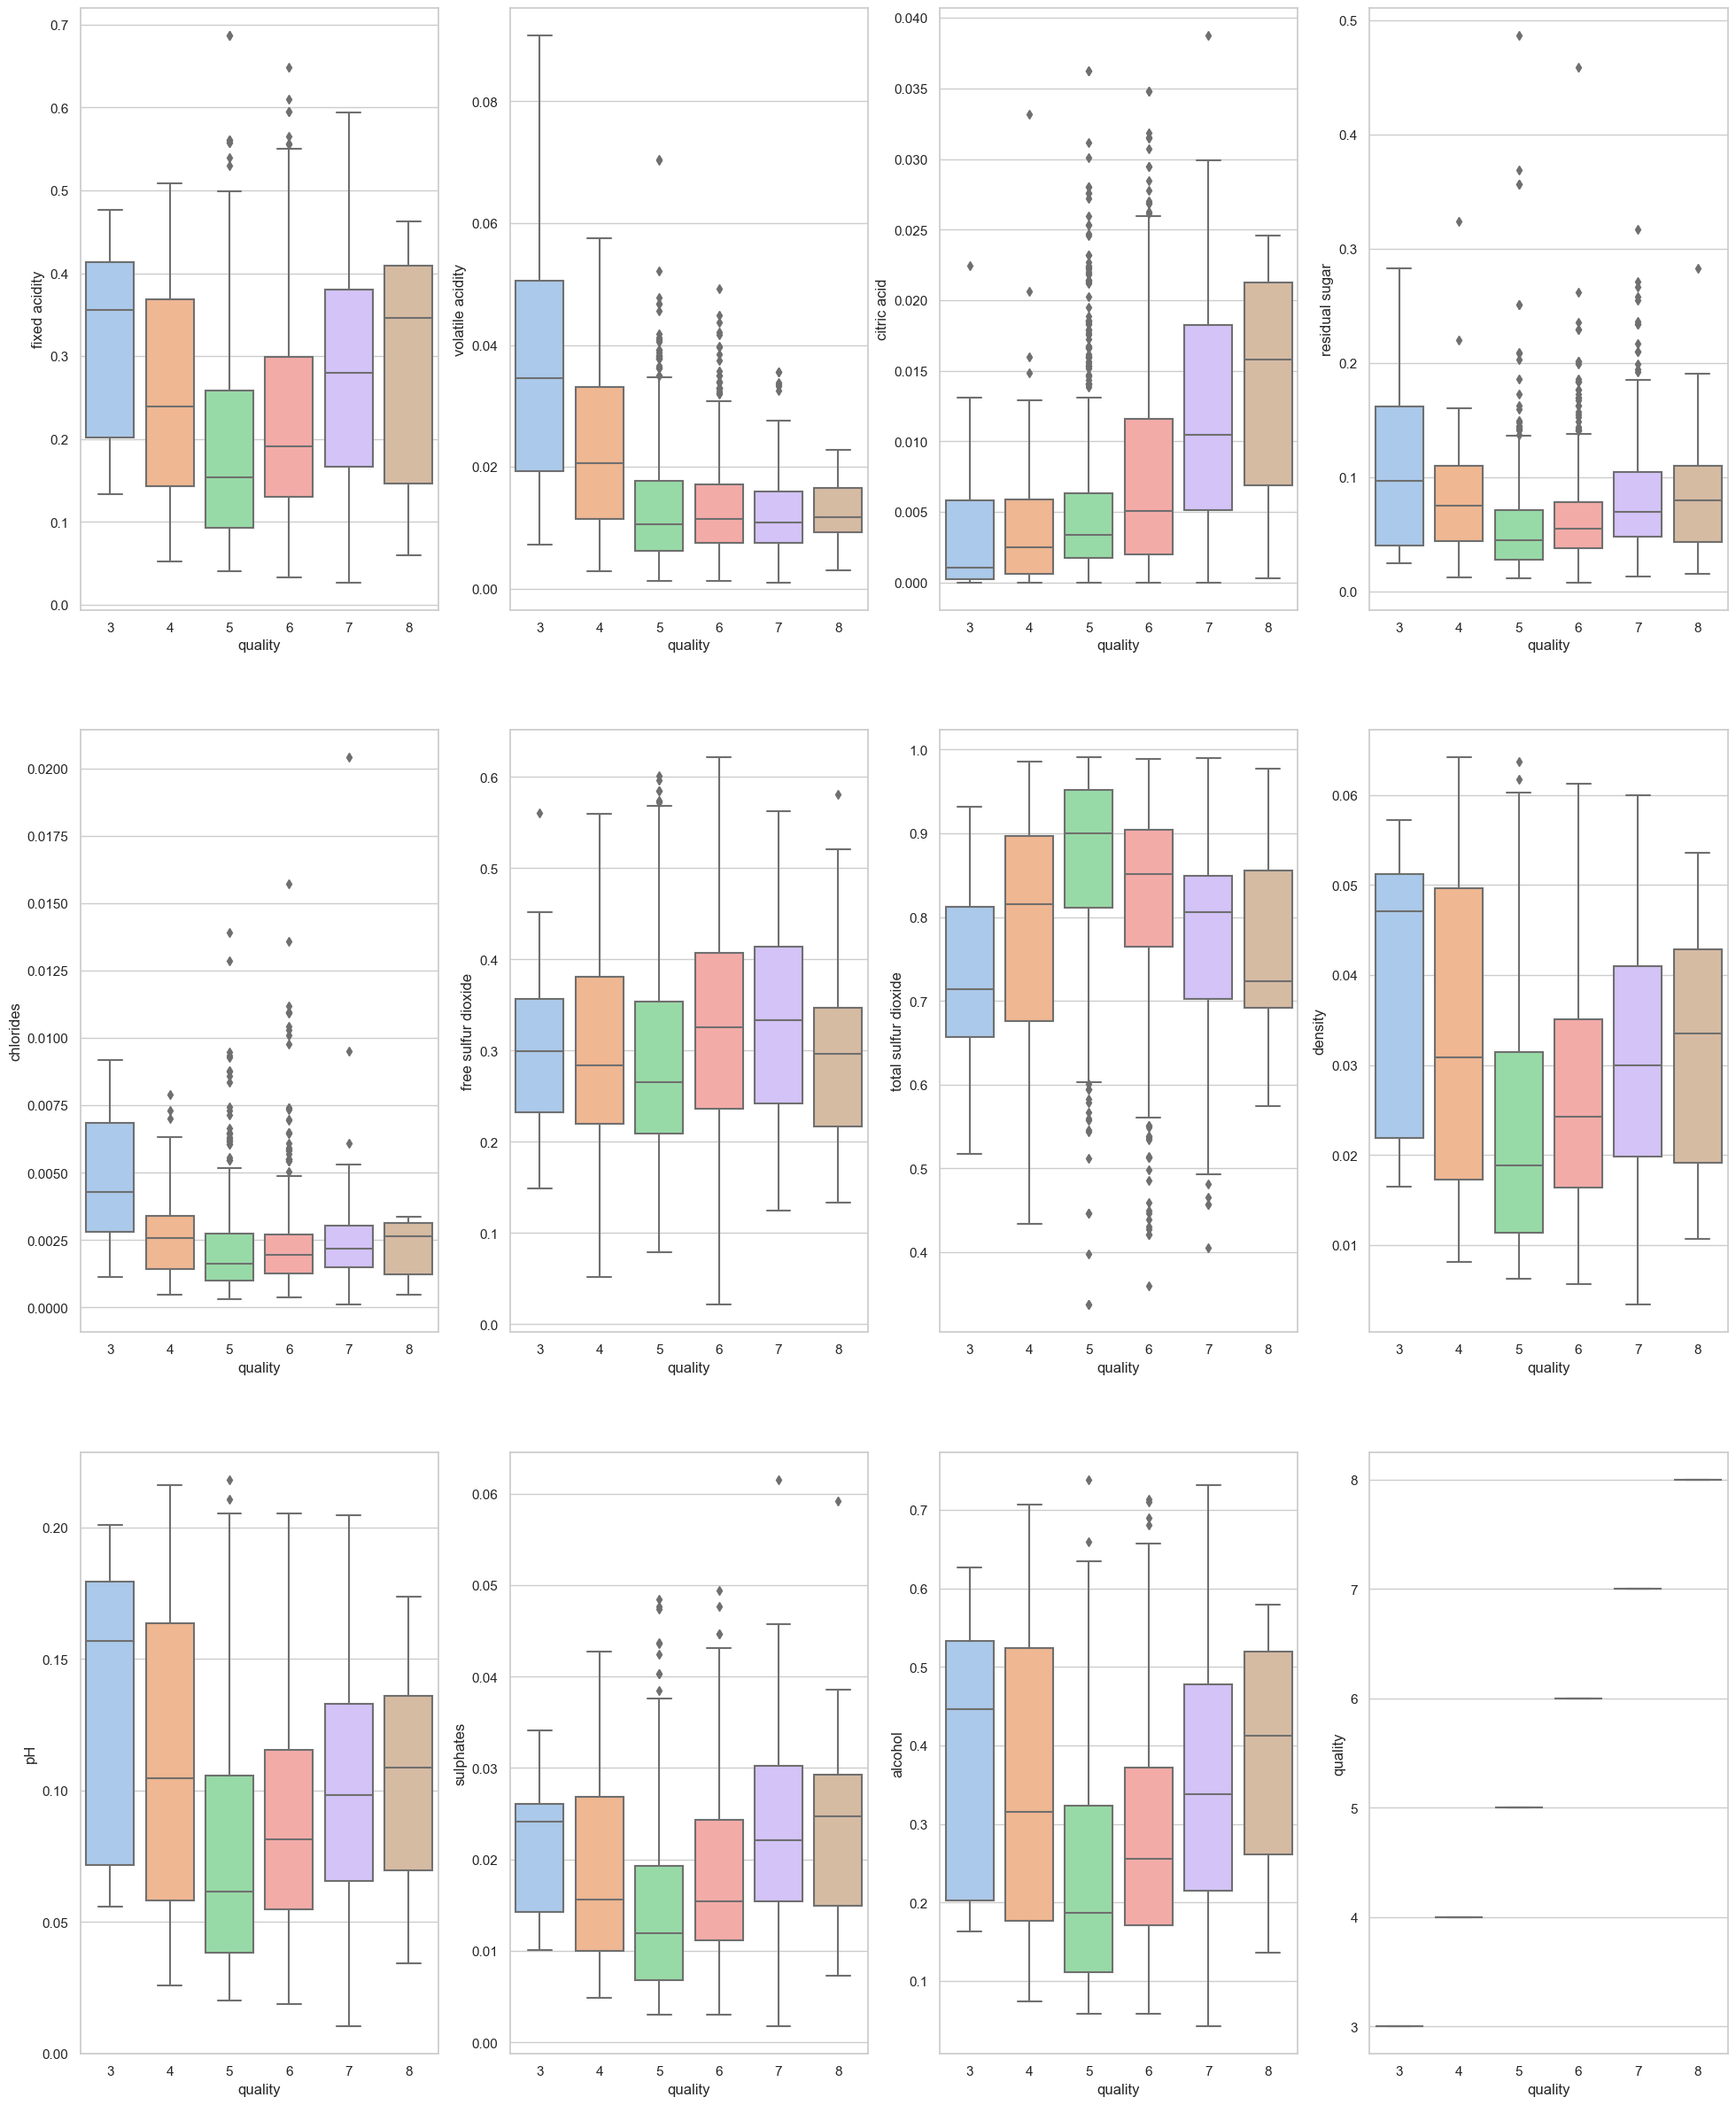

In [35]:
#Do same for white wines.
sb.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(normalizedred.columns)
for i in range(3):
    for j in range(4):
            sb.boxplot(x=normalizedred['quality'], y=normalizedred[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

In [36]:
#pop qualities again before training
redwinelabels=normalizedred.pop('quality')
whitewinelabels=normalizedwhite.pop('quality')

warnings.resetwarnings()

In [37]:
def normalizedtrain(winetype,iters): 
    accuracies=[]
    if winetype == 'white':
        data = normalizedwhite
        labels = whitewinelabels
    else:
        data = normalizedred
        labels = redwinelabels
        
    for iterations in range (iters):
        accuracies.append(trainandeval(data, labels, winetype+str(iterations+1)))
    print(accuracies)
    return sum(accuracies)/iters

Accuracy of Decision Tree on  red1  training is:  1.0
Accuracy of Decision Tree on  red1  test data is:  0.625


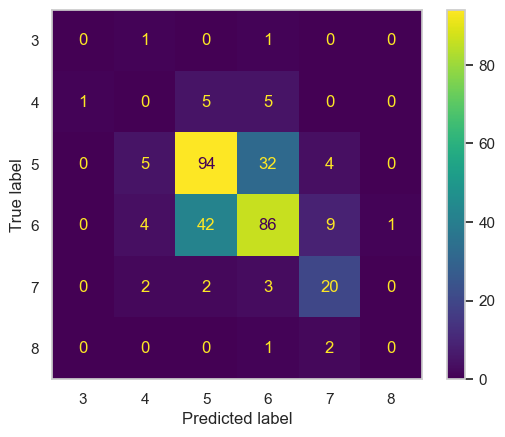

Accuracy of Decision Tree on  red2  training is:  1.0
Accuracy of Decision Tree on  red2  test data is:  0.6


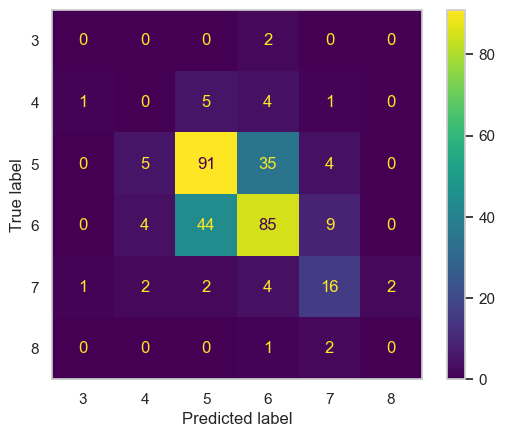

Accuracy of Decision Tree on  red3  training is:  1.0
Accuracy of Decision Tree on  red3  test data is:  0.59375


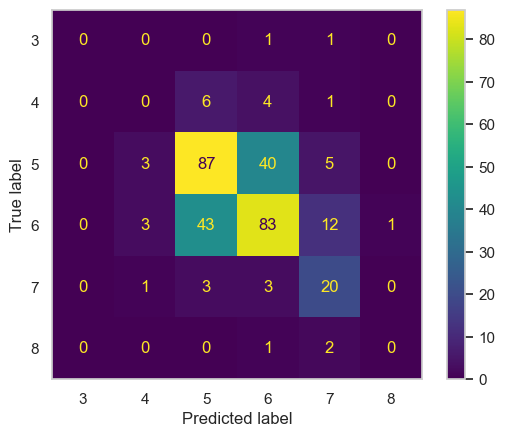

Accuracy of Decision Tree on  red4  training is:  1.0
Accuracy of Decision Tree on  red4  test data is:  0.59375


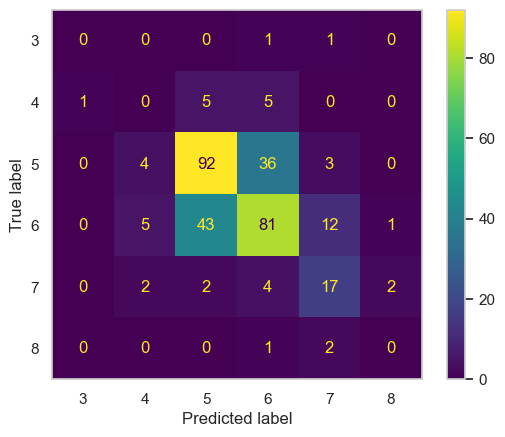

Accuracy of Decision Tree on  red5  training is:  1.0
Accuracy of Decision Tree on  red5  test data is:  0.603125


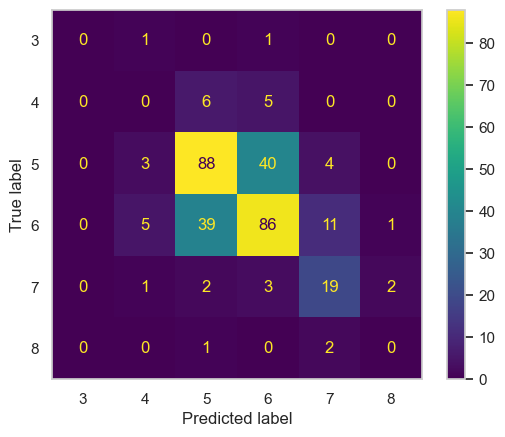

[0.625, 0.6, 0.59375, 0.59375, 0.603125]
0.603125
Accuracy of Decision Tree on  white1  training is:  1.0
Accuracy of Decision Tree on  white1  test data is:  0.5653061224489796


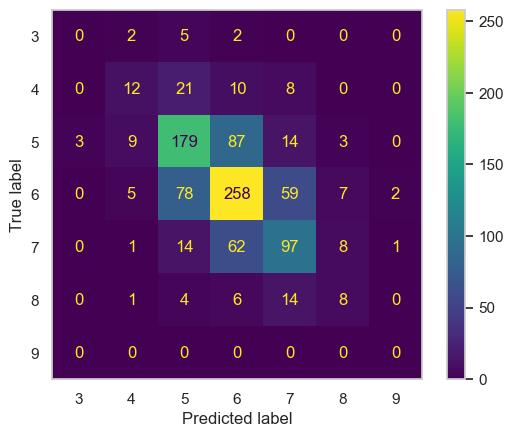

Accuracy of Decision Tree on  white2  training is:  1.0
Accuracy of Decision Tree on  white2  test data is:  0.5755102040816327


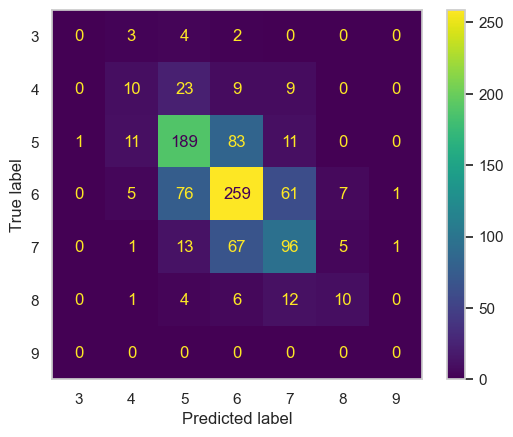

Accuracy of Decision Tree on  white3  training is:  1.0
Accuracy of Decision Tree on  white3  test data is:  0.5612244897959183


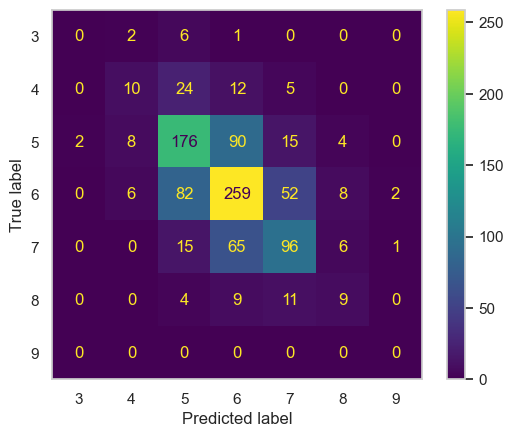

Accuracy of Decision Tree on  white4  training is:  1.0
Accuracy of Decision Tree on  white4  test data is:  0.5653061224489796


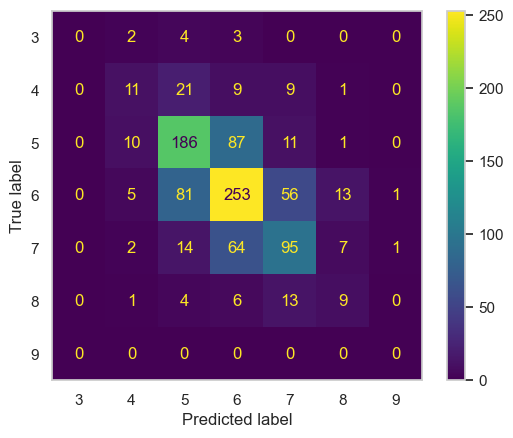

Accuracy of Decision Tree on  white5  training is:  1.0
Accuracy of Decision Tree on  white5  test data is:  0.5785714285714286


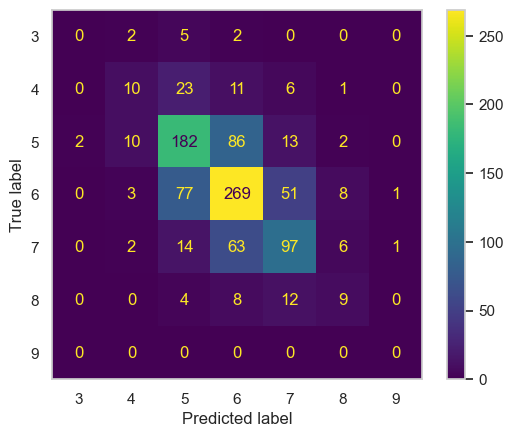

[0.5653061224489796, 0.5755102040816327, 0.5612244897959183, 0.5653061224489796, 0.5785714285714286]
0.5691836734693878


In [38]:
print(normalizedtrain('red', 5))
print(normalizedtrain('white', 5))

In [39]:
#Standardscale the original data
stdscredwinedata = redwinedataraw.copy()
stdscwhitewinedata = whitewinedataraw.copy()
whitewinelabels = stdscwhitewinedata.pop('quality')
redwinelabels = stdscredwinedata.pop('quality')
stdscred = pd.DataFrame(StandardScaler().fit_transform(stdscredwinedata),columns=redwinedata.columns)
stdscwhite = pd.DataFrame(StandardScaler().fit_transform(stdscwhitewinedata),columns=redwinedata.columns)

stdscred['quality'] = redwinelabels
stdscwhite['quality'] = whitewinelabels



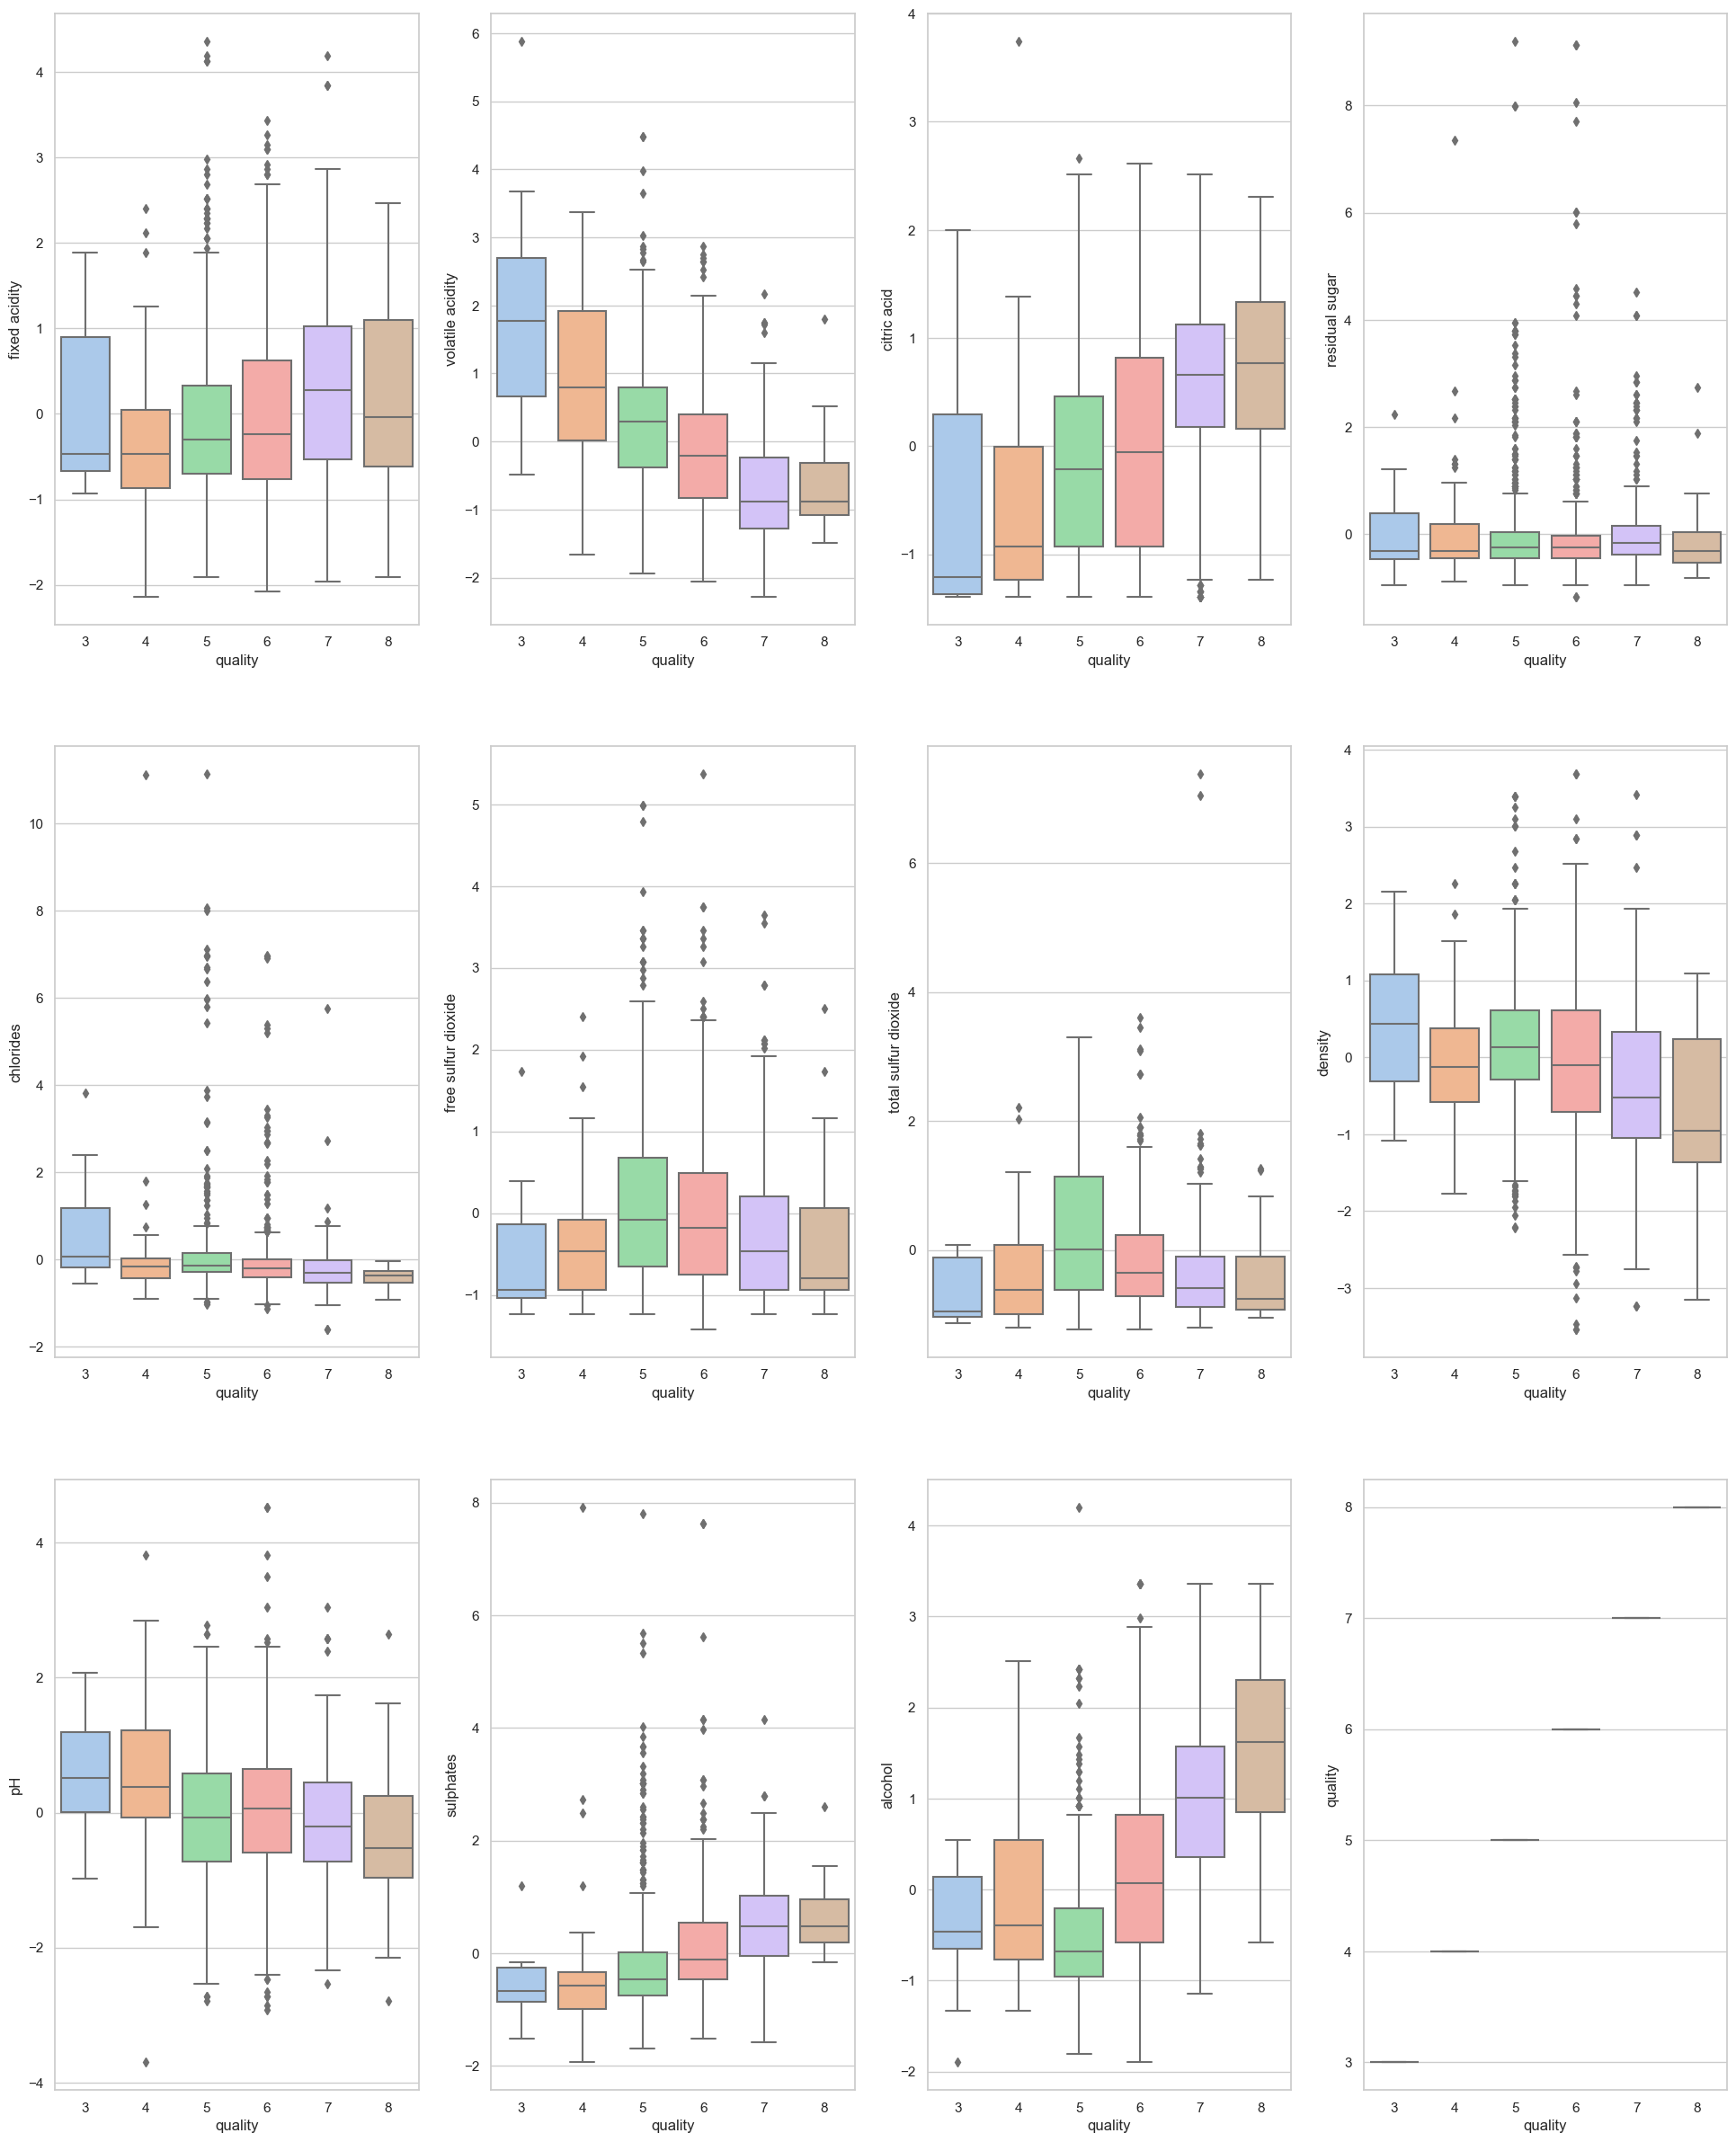

In [40]:
#Show red distribution

warnings.filterwarnings("ignore")

#Print out sub box plots for distribution of each feature in a 3x4 grid for red wines
sb.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(stdscred.columns)
for i in range(3):
    for j in range(4):
            sb.boxplot(x=stdscred['quality'], y=stdscred[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

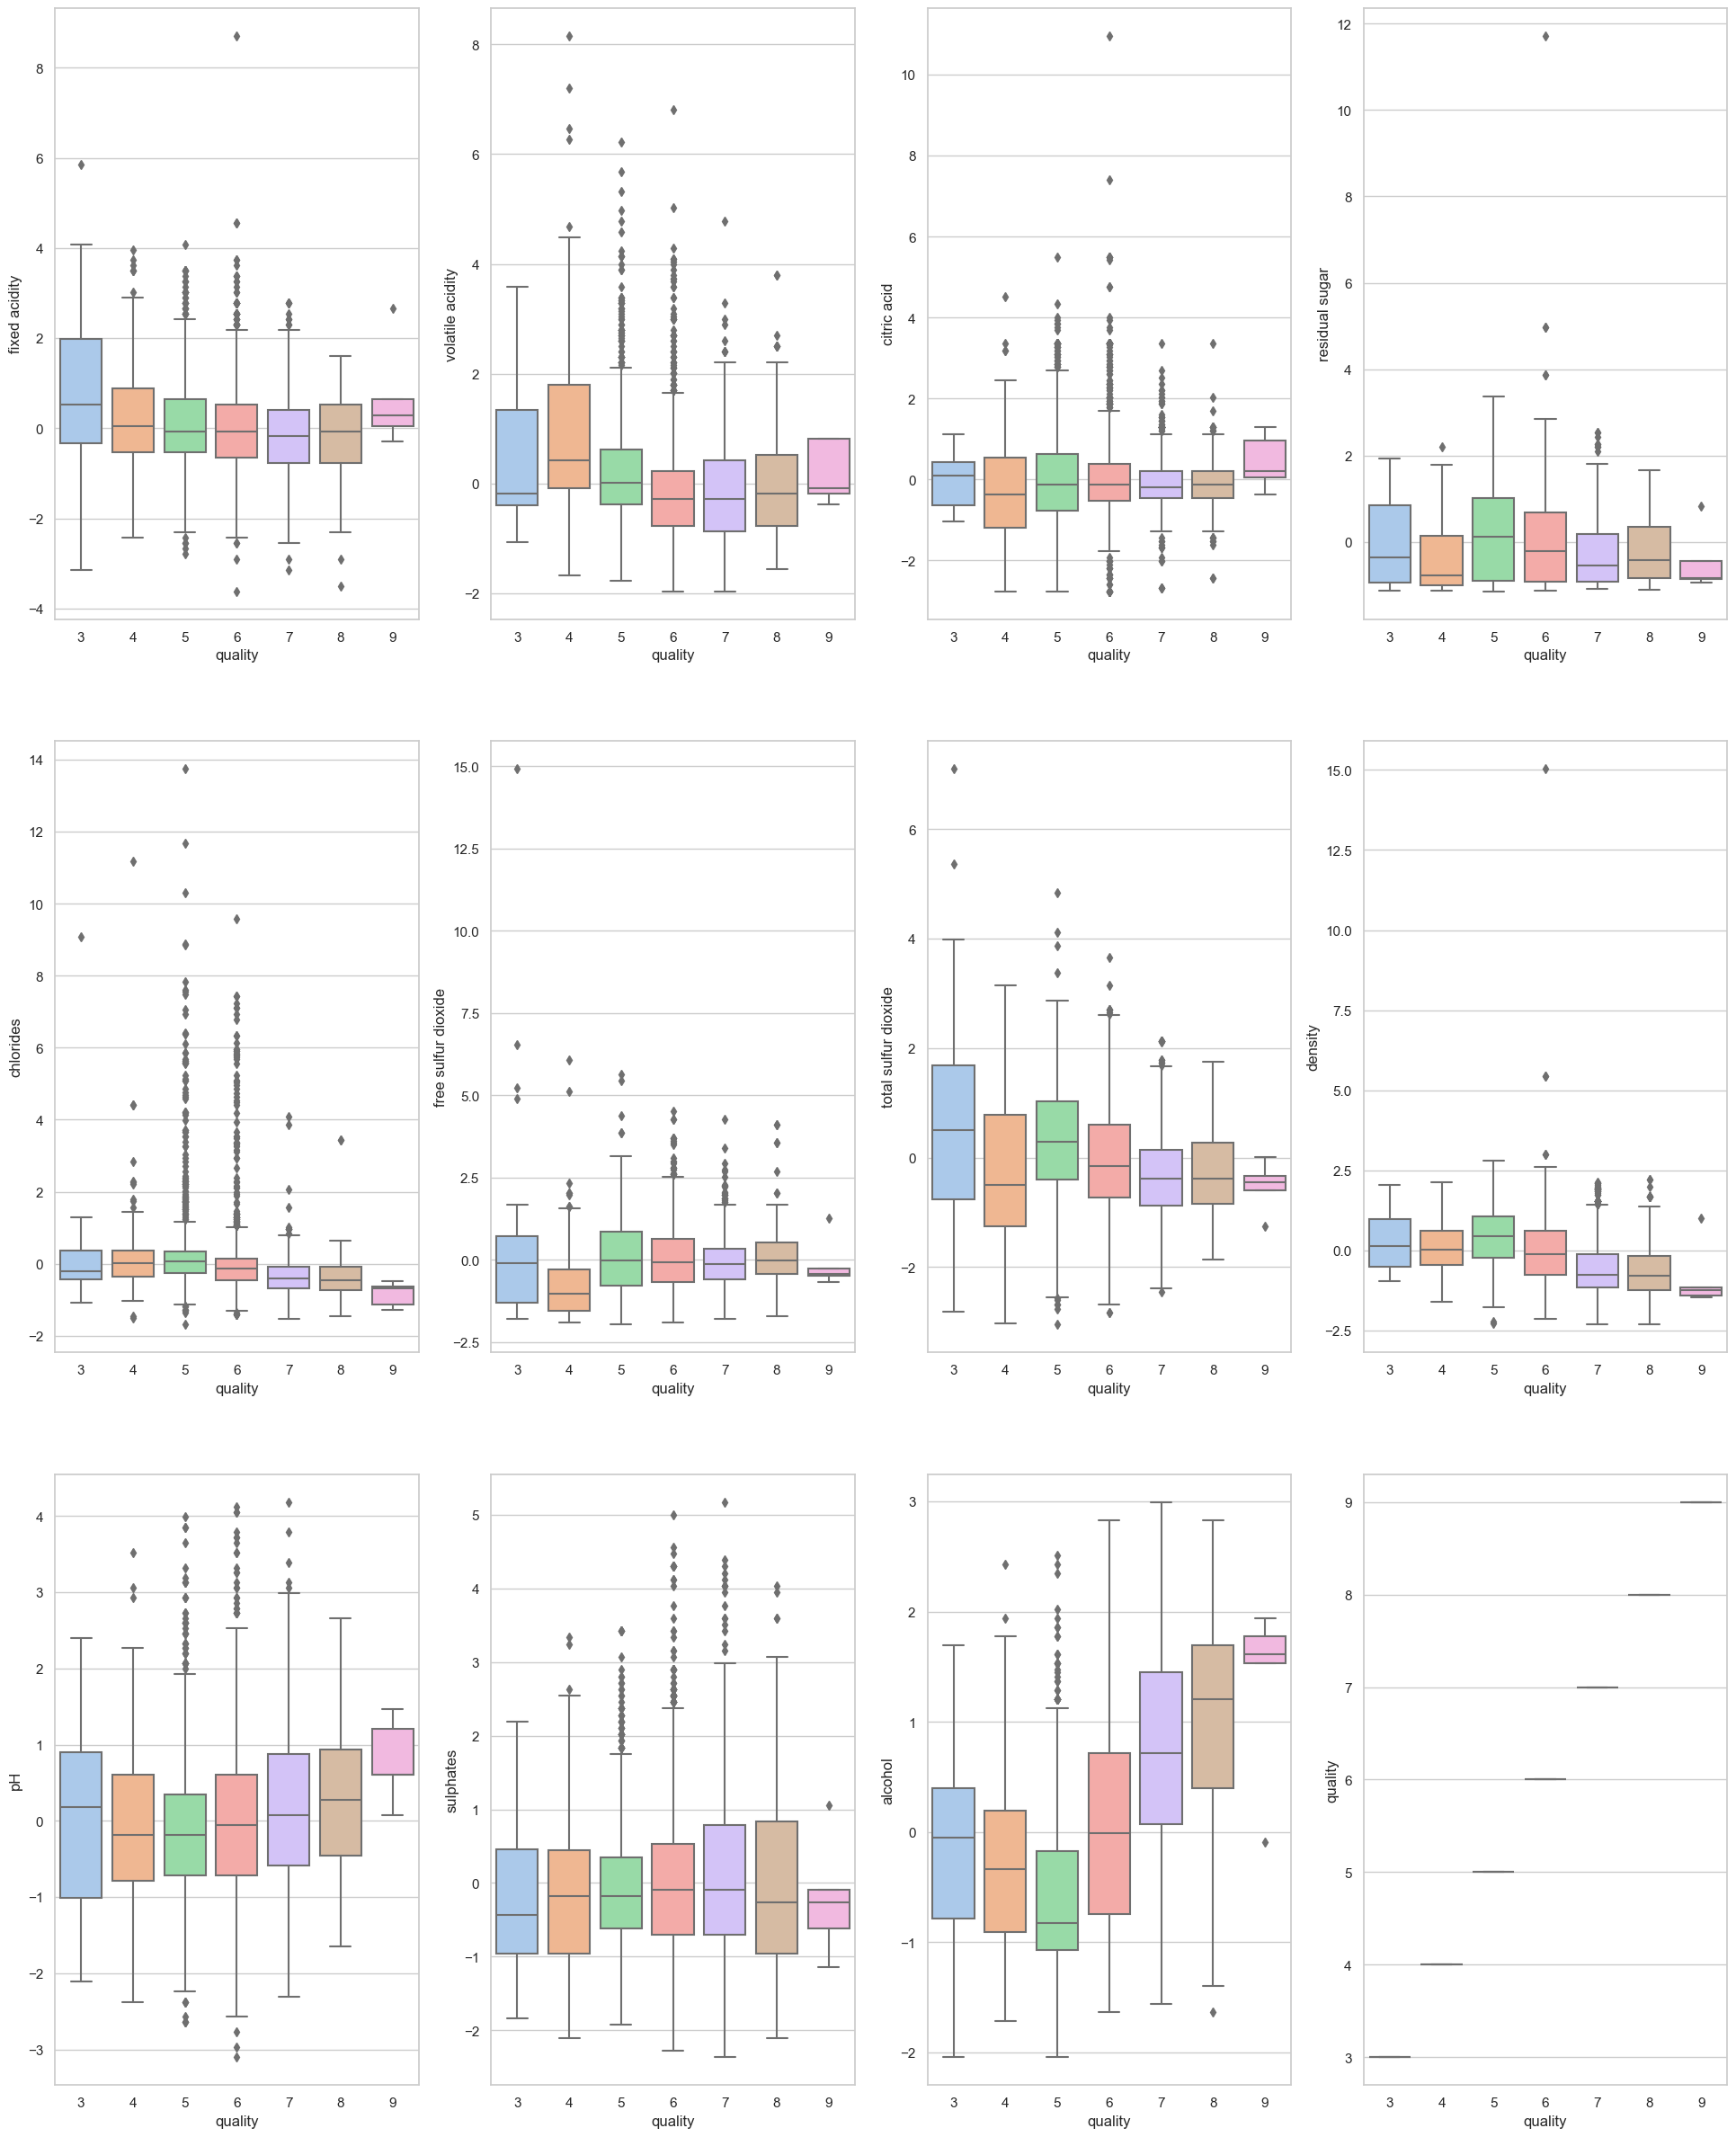

In [41]:
#Same for white

#Print out sub box plots for distribution of each feature in a 3x4 grid
sb.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(stdscred.columns)
for i in range(3):
    for j in range(4):
            sb.boxplot(x=stdscwhite['quality'], y=stdscwhite[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

In [42]:
redwinelabels = stdscred.pop('quality')
whitewinelabels = stdscwhite.pop('quality')

In [43]:
def stdscaletrain(winetype,iters): 
    accuracies=[]
    if winetype == 'white':
        data = stdscwhite
        labels = whitewinelabels
    else:
        data = stdscred
        labels = redwinelabels
        
    for iterations in range (iters):
        accuracies.append(trainandeval(data, labels, winetype+str(iterations+1)))
    print(accuracies)
    return sum(accuracies)/iters

Accuracy of Decision Tree on  red1  training is:  1.0
Accuracy of Decision Tree on  red1  test data is:  0.653125


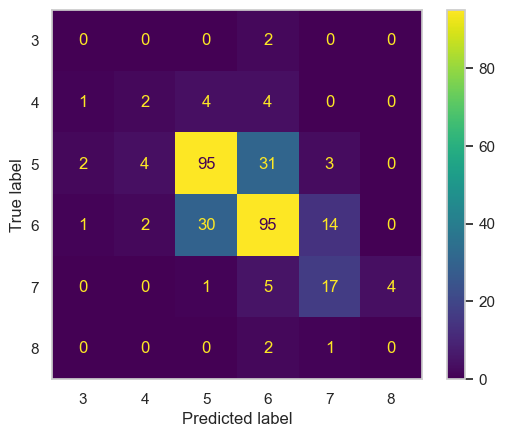

Accuracy of Decision Tree on  red2  training is:  1.0
Accuracy of Decision Tree on  red2  test data is:  0.653125


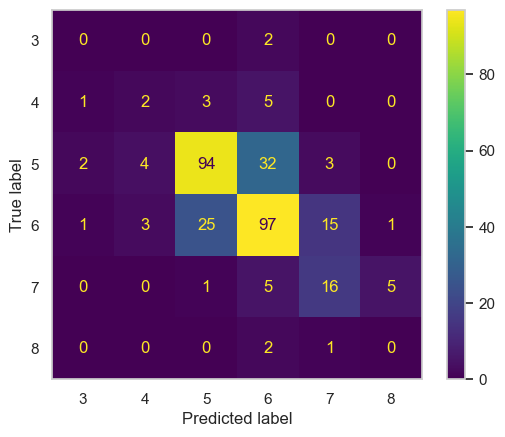

Accuracy of Decision Tree on  red3  training is:  1.0
Accuracy of Decision Tree on  red3  test data is:  0.671875


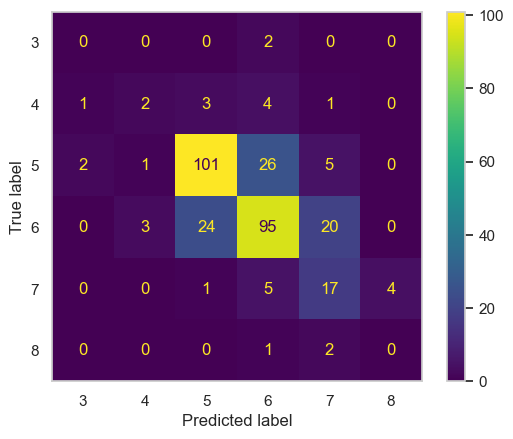

Accuracy of Decision Tree on  red4  training is:  1.0
Accuracy of Decision Tree on  red4  test data is:  0.6625


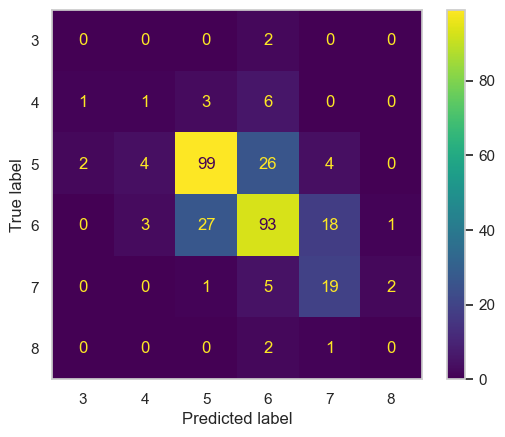

Accuracy of Decision Tree on  red5  training is:  1.0
Accuracy of Decision Tree on  red5  test data is:  0.675


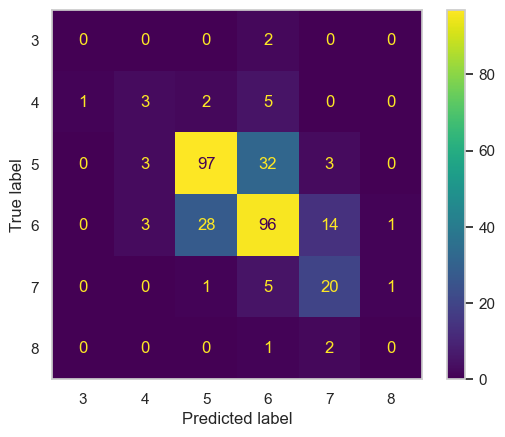

[0.653125, 0.653125, 0.671875, 0.6625, 0.675]
0.663125
Accuracy of Decision Tree on  white1  training is:  1.0
Accuracy of Decision Tree on  white1  test data is:  0.5877551020408164


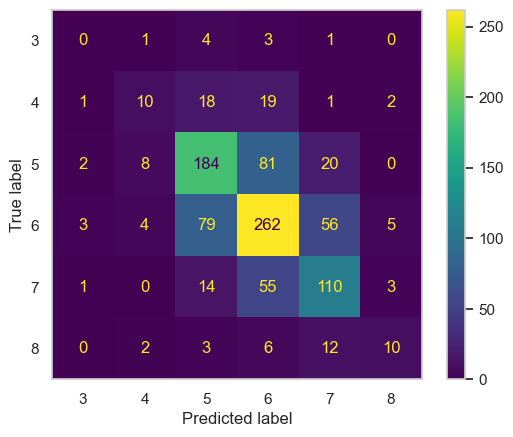

Accuracy of Decision Tree on  white2  training is:  1.0
Accuracy of Decision Tree on  white2  test data is:  0.5816326530612245


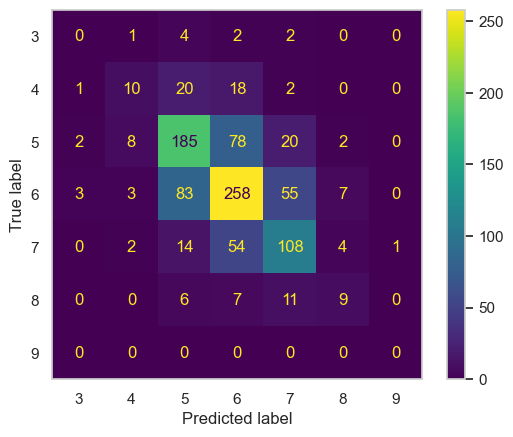

Accuracy of Decision Tree on  white3  training is:  1.0
Accuracy of Decision Tree on  white3  test data is:  0.5795918367346938


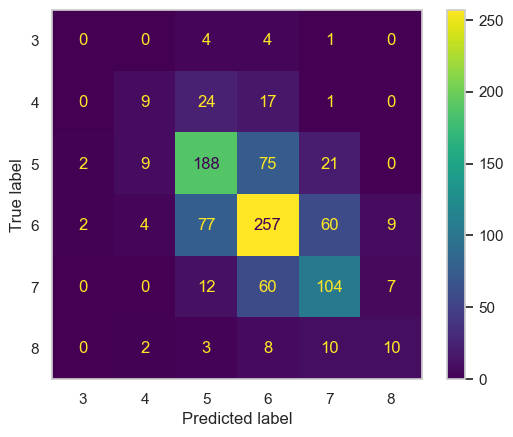

Accuracy of Decision Tree on  white4  training is:  1.0
Accuracy of Decision Tree on  white4  test data is:  0.5836734693877551


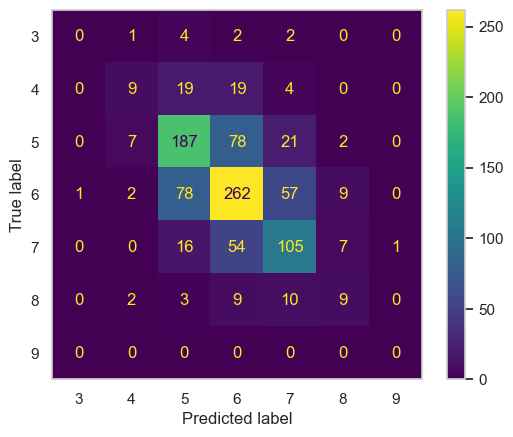

Accuracy of Decision Tree on  white5  training is:  1.0
Accuracy of Decision Tree on  white5  test data is:  0.5785714285714286


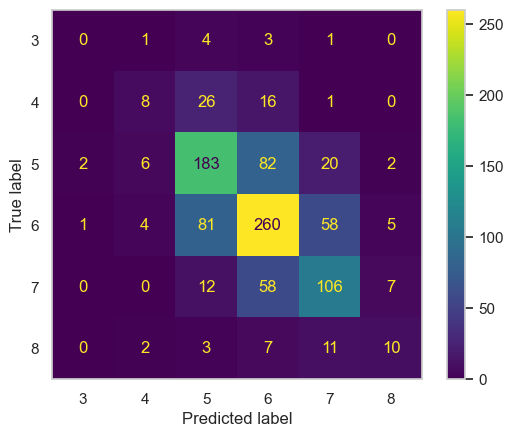

[0.5877551020408164, 0.5816326530612245, 0.5795918367346938, 0.5836734693877551, 0.5785714285714286]
0.5822448979591837


In [44]:
print(stdscaletrain('red', 5))

print(stdscaletrain('white', 5))

Standard Scale Transformation does not appear to result in any significant affect on the performance.  Some research suggests performing Log Transformation on skewed feature data may have a more significant effect. 

Lets perform training from now on on the WHITE wine data only since that seems to have more room for improvement.

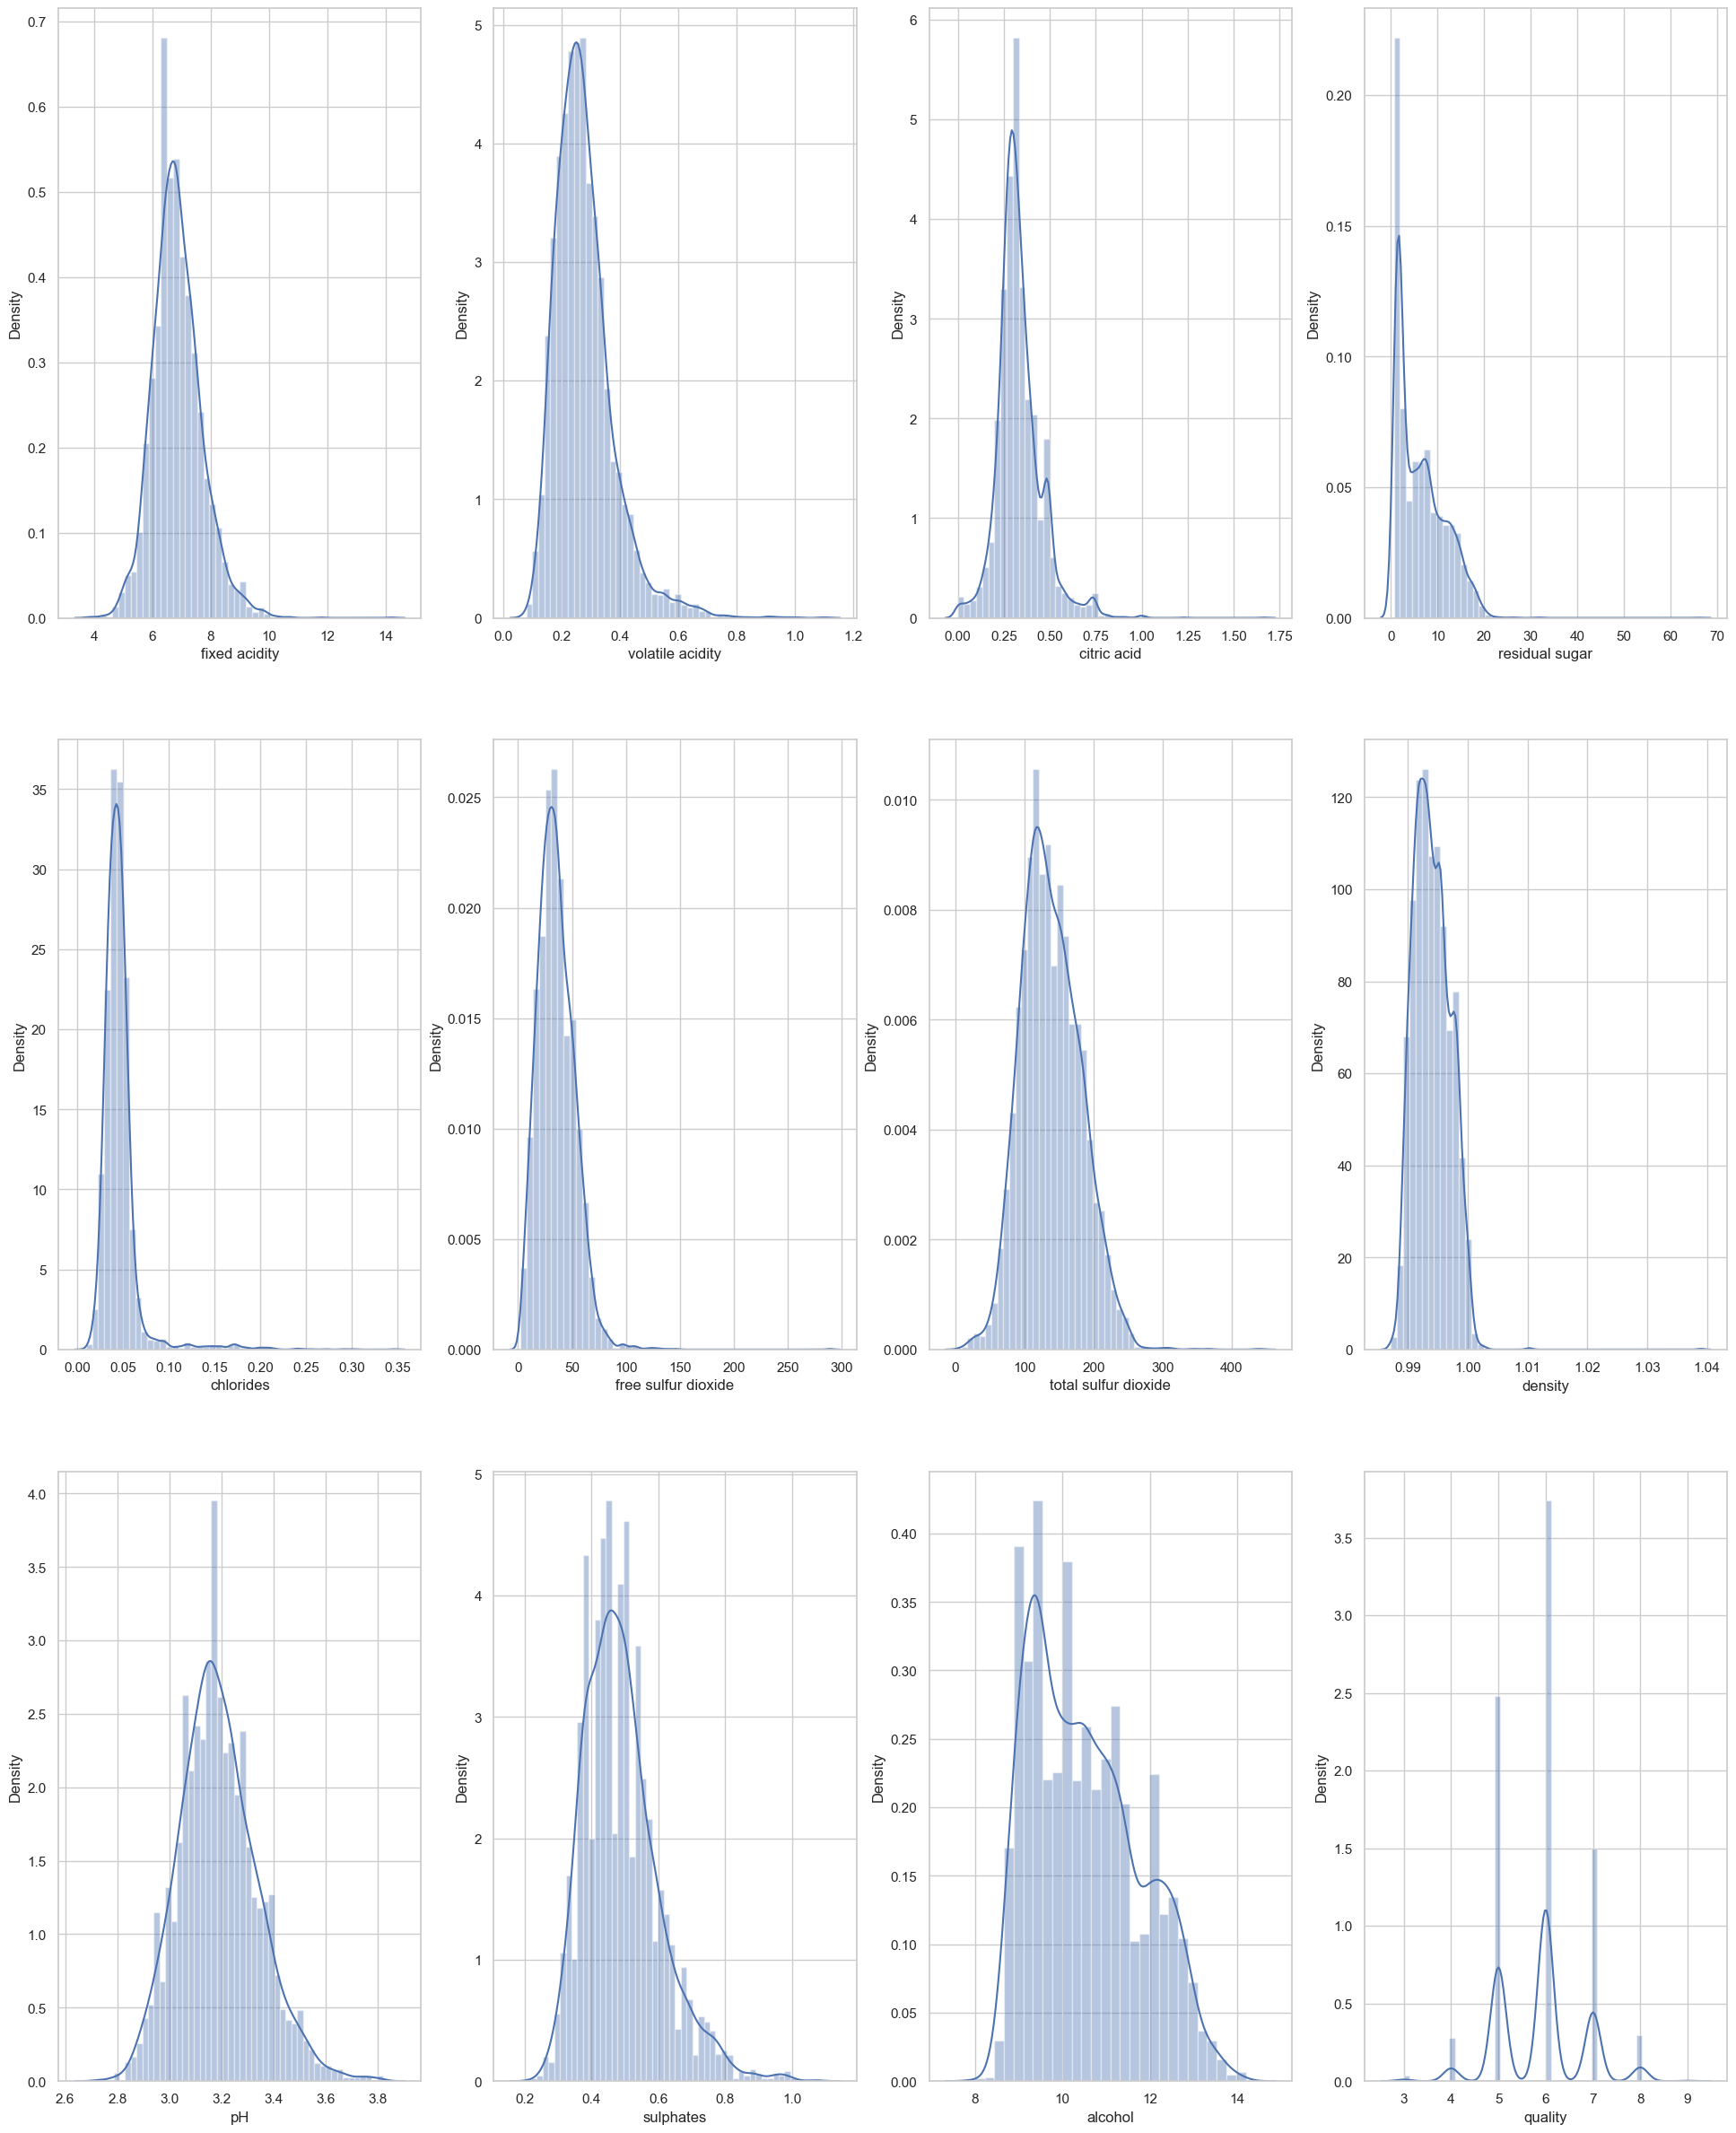

In [45]:
whitewinedata=whitewinedataraw.copy()

color = sb.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(whitewinedata.columns)
for i in range(3):
    for j in range(4):
            sb.distplot(whitewinedata[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

Data distribution graphs show  the following features are highly skewed with more data on the left side, and less on the right.  The following features are highly skewed:  

1. residual sugar
2. chlorides
3. free sulfur dioxide
4. total sulfur dioxide
5. sulfates

In [46]:
#Make a simple function that returns the log transformation of a column within the dataset 
#But not one that performs transformation on the ENTIRE dataset as not all features benefit from this transform.

def log_transform(col):
    return np.log(col[0])

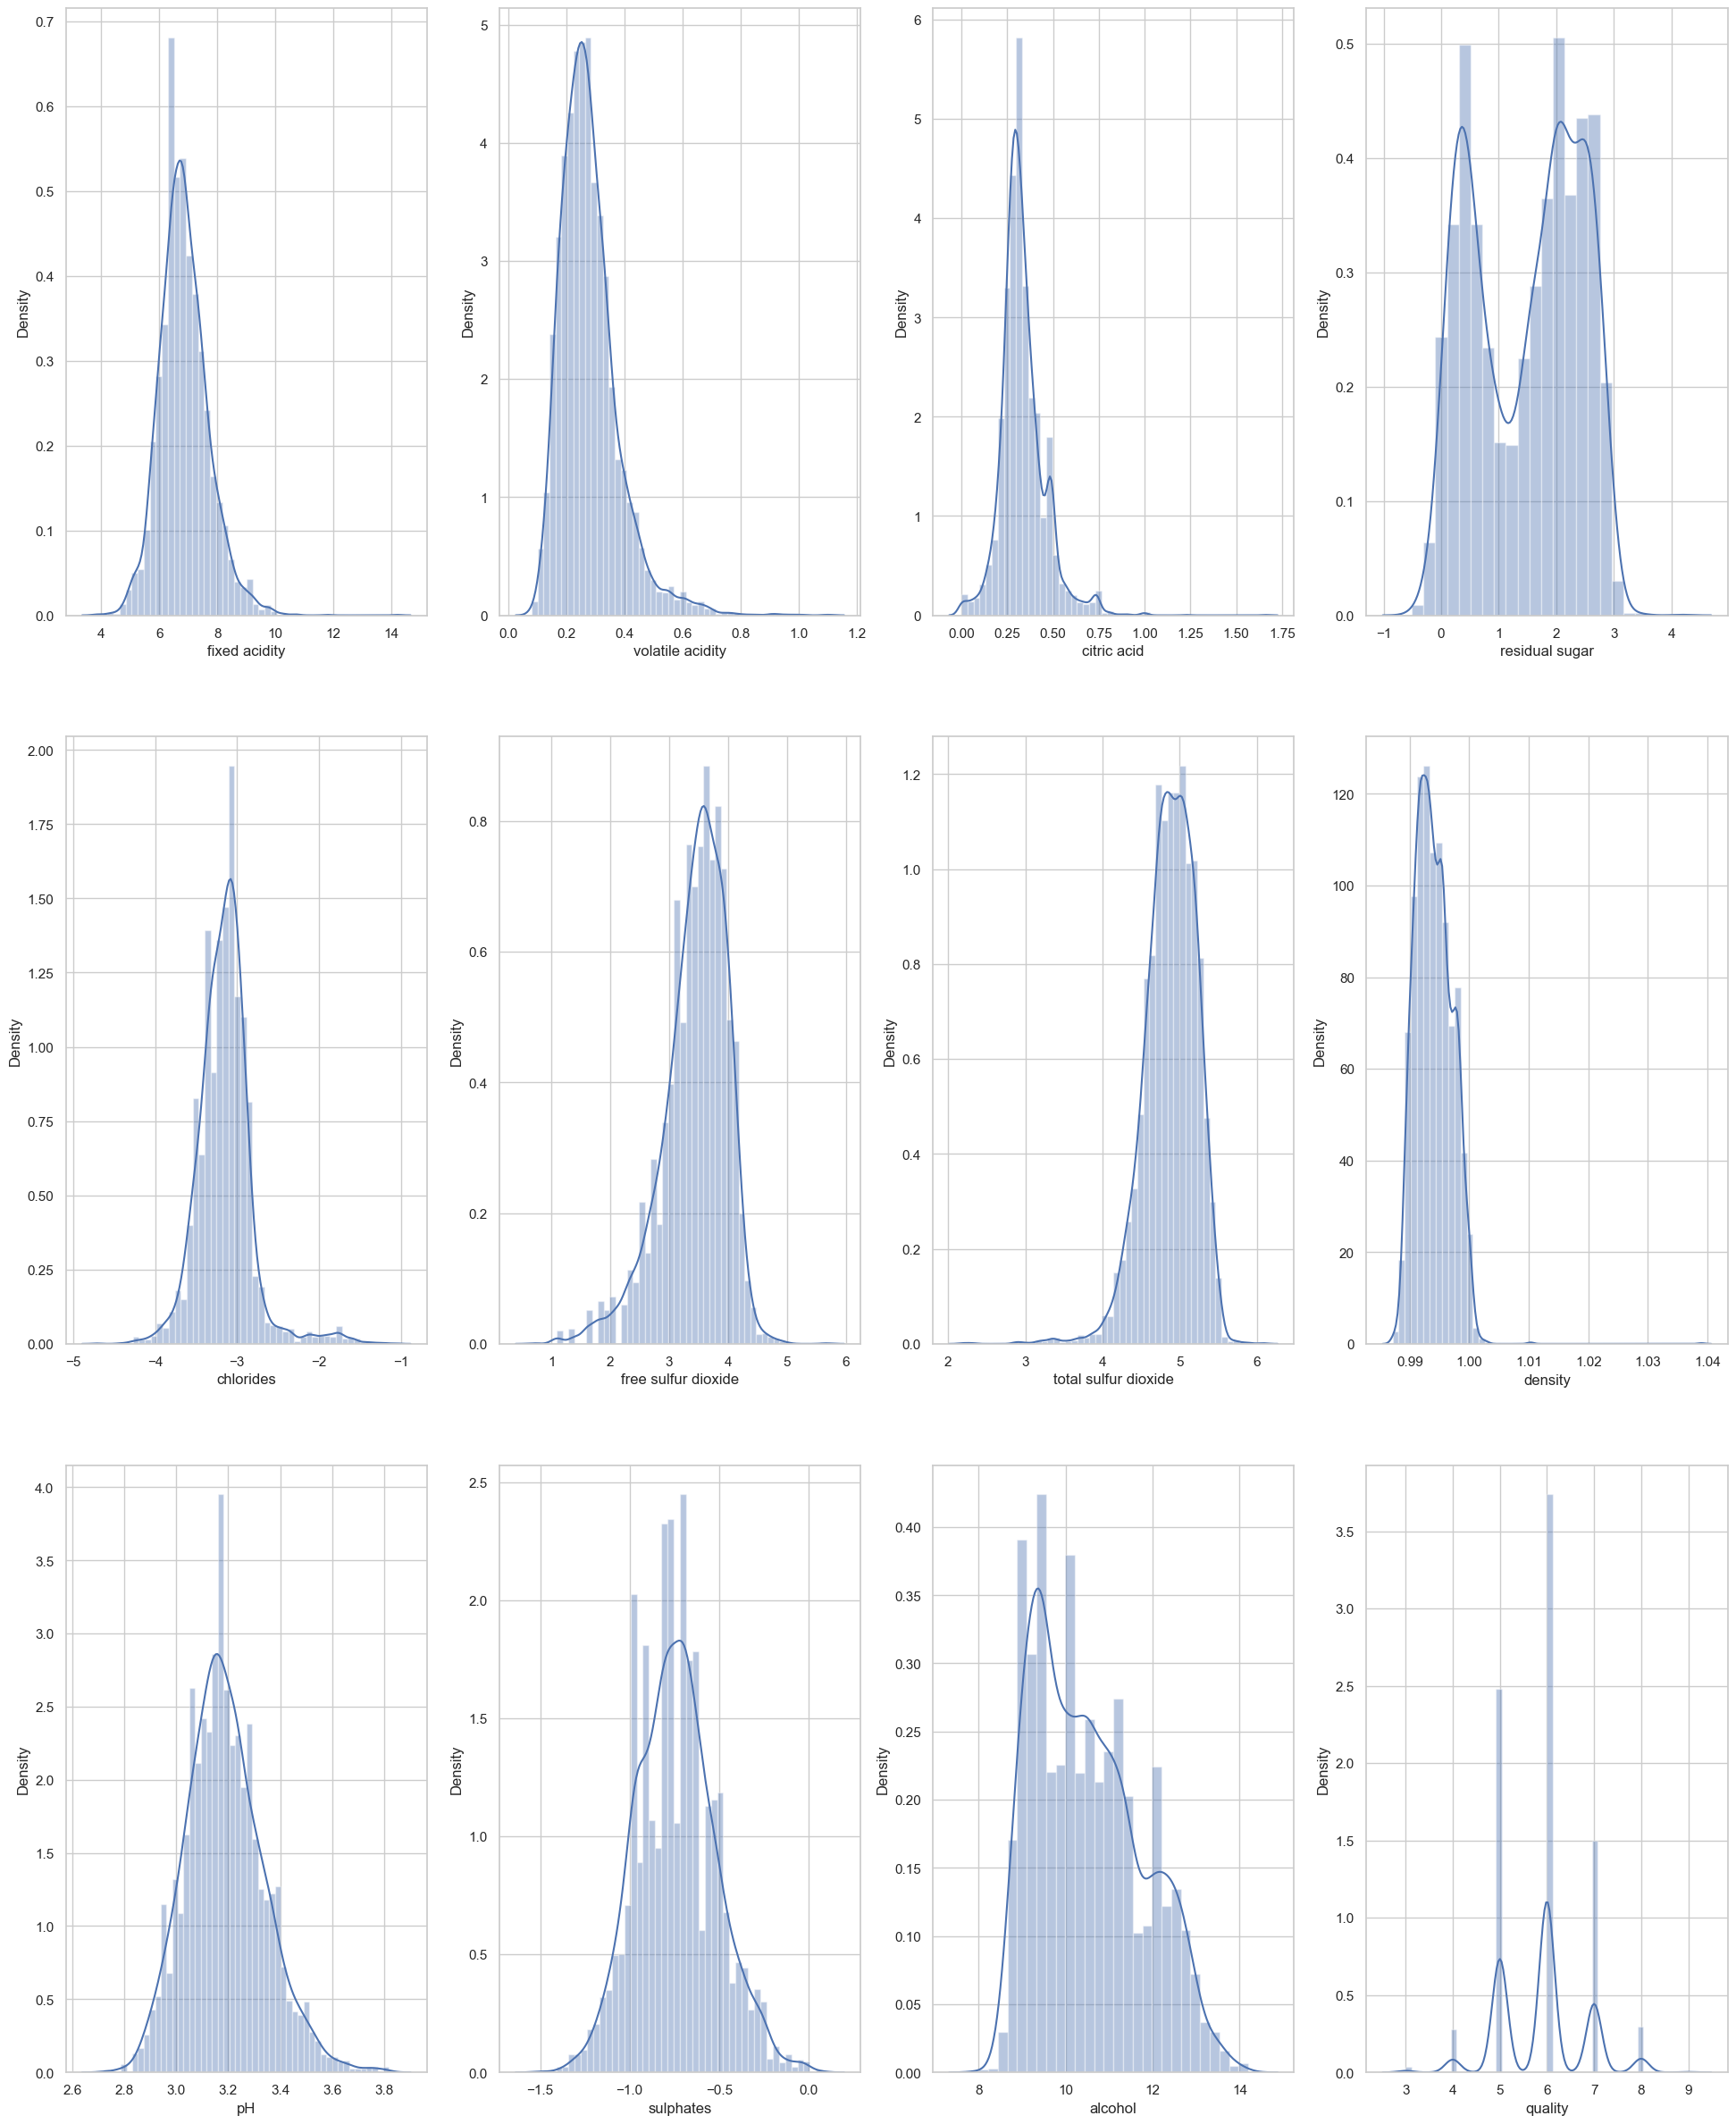

In [47]:
#log transform these values within the dataset
logtranswhite = whitewinedataraw.copy()
logtranswhite['residual sugar'] = logtranswhite[['residual sugar']].apply(log_transform, axis=1)
logtranswhite['chlorides'] = logtranswhite[['chlorides']].apply(log_transform, axis=1)
logtranswhite['free sulfur dioxide'] = logtranswhite[['free sulfur dioxide']].apply(log_transform, axis=1)
logtranswhite['total sulfur dioxide'] = logtranswhite[['total sulfur dioxide']].apply(log_transform, axis=1)
logtranswhite['sulphates'] = logtranswhite[['sulphates']].apply(log_transform, axis=1)


color = sb.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(logtranswhite.columns)
for i in range(3):
    for j in range(4):
            sb.distplot(logtranswhite[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

In [48]:
def logtranstrain(winetype,iters): 
    accuracies=[]
    if winetype == 'white':
        data = logtranswhite
        labels = whitewinelabels
    else:
        data = stdscred
        labels = redwinelabels
        
    for iterations in range (iters):
        accuracies.append(trainandeval(data, labels, winetype+str(iterations+1)))
    print(accuracies)
    return sum(accuracies)/iters

Accuracy of Decision Tree on  white1  training is:  1.0
Accuracy of Decision Tree on  white1  test data is:  0.5775510204081633


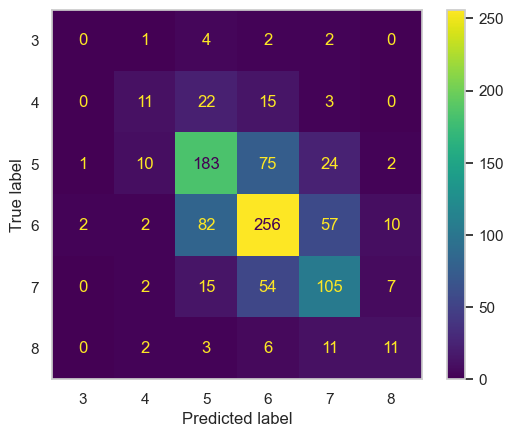

Accuracy of Decision Tree on  white2  training is:  1.0
Accuracy of Decision Tree on  white2  test data is:  0.5775510204081633


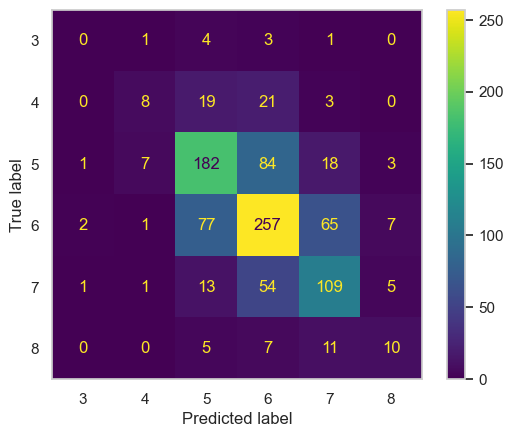

Accuracy of Decision Tree on  white3  training is:  1.0
Accuracy of Decision Tree on  white3  test data is:  0.5816326530612245


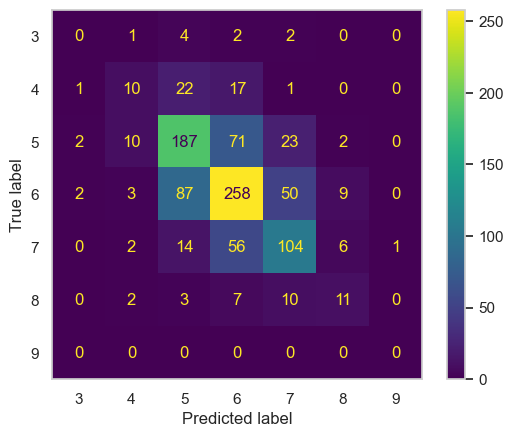

Accuracy of Decision Tree on  white4  training is:  1.0
Accuracy of Decision Tree on  white4  test data is:  0.5806122448979592


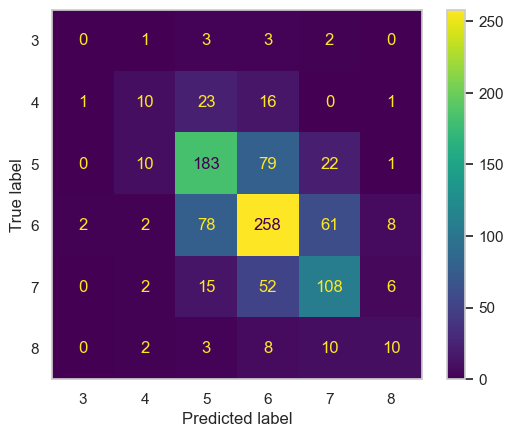

Accuracy of Decision Tree on  white5  training is:  1.0
Accuracy of Decision Tree on  white5  test data is:  0.5897959183673469


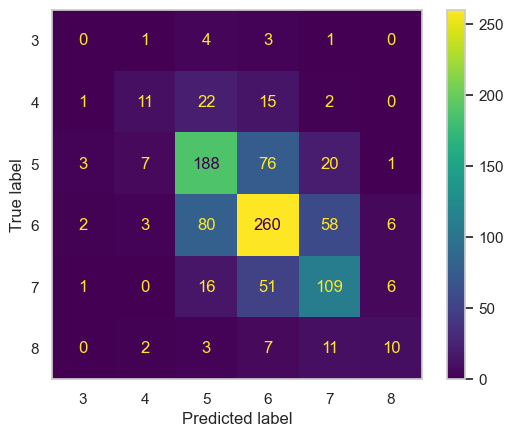

[0.5775510204081633, 0.5775510204081633, 0.5816326530612245, 0.5806122448979592, 0.5897959183673469]


0.5814285714285715

In [49]:
logtranswhite.pop('quality')
logtranstrain('white', 5)

Performance is still not greatly affected by changing the distribution of the features to make them more well distributed.  Try to fix the label skew by upsampling undersampled classes:

In [64]:
#Create a new dataset made of balanced class samples
balwhite = whitewinedataraw.copy()


In [65]:
#Define a function for this
def baldataset(data, winetype, show):
    if winetype == 'white':
        numsamp = 1000
    else:
        numsamp = 500
        
    class3 = data.loc[(data['quality']==3)] #Underrepresented 
    class4 = data.loc[(data['quality']==4)] #Underrepresented           
    class5 = data.loc[(data['quality']==5)] #Overrepresented   
    class6 = data.loc[(data['quality']==6)] #Overrepresented
    class7 = data.loc[(data['quality']==7)] #Underrepresented     
    class8 = data.loc[(data['quality']==8)] #Underrepresented    
    class9 = data.loc[(data['quality']==9)] #Underrepresented   

    class3_up = resample(class3, replace=True, n_samples=numsamp, random_state=10) 
    class4_up = resample(class4, replace=True, n_samples=numsamp, random_state=10) 
    class7_up = resample(class7, replace=True, n_samples=numsamp, random_state=10) 
    class8_up = resample(class8, replace=True, n_samples=numsamp, random_state=10) 
    class9_up = resample(class9, replace=True, n_samples=numsamp, random_state=10)

    # Combine downsampled majority class with upsampled minority class
    balanceddata = pd.concat([class3_up, class4_up, class5, class6, class7_up, class8_up, class9_up]).reset_index(drop=True)
    #balwhitelabels = balwhite.pop('quality')  

    #display(balanceddata)

    if show == True:
        #Show a histogram of the distribution of label data
        plt.figure(figsize=(10,6))
        sb.countplot(x='quality', data=balanceddata, order=[3, 4, 5, 6, 7, 8, 9], palette='pastel')
    
    return balanceddata

In [66]:
balwhite = baldataset(balwhite, 'white', False)

balwhitelabels = balwhite.pop('quality')
   

In [67]:
#Now lets train and evaluate with less skewed labels:
def baltrain(winetype,iters): 
    accuracies=[]
    if winetype == 'white':
        data = balwhite
        labels = balwhitelabels
    else:
        data = redwinedata
        labels = redwinelabels
        
    for iterations in range (iters):
        accuracies.append(trainandeval(data, labels, winetype+str(iterations+1)))
    print(accuracies)
    return sum(accuracies)/iters
        

Accuracy of Decision Tree on  white1  training is:  1.0
Accuracy of Decision Tree on  white1  test data is:  0.8197573656845754


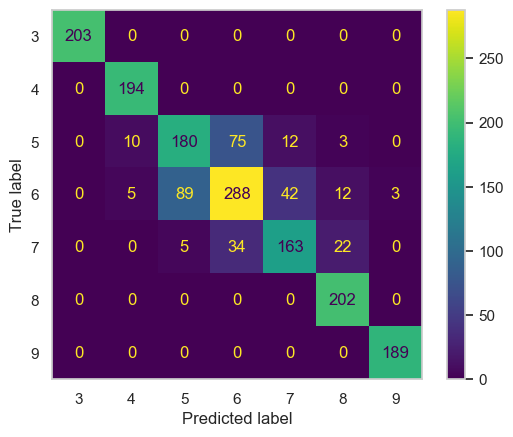

Accuracy of Decision Tree on  white2  training is:  1.0
Accuracy of Decision Tree on  white2  test data is:  0.8232235701906413


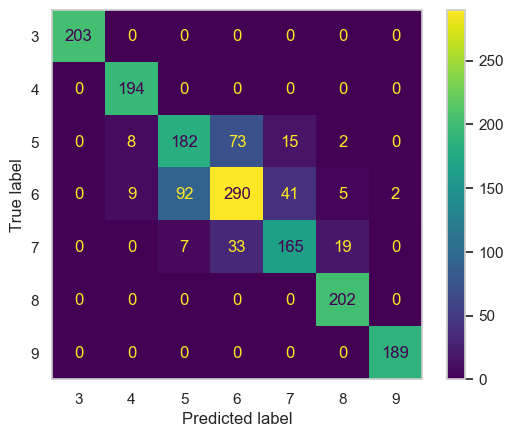

Accuracy of Decision Tree on  white3  training is:  1.0
Accuracy of Decision Tree on  white3  test data is:  0.8261120739456961


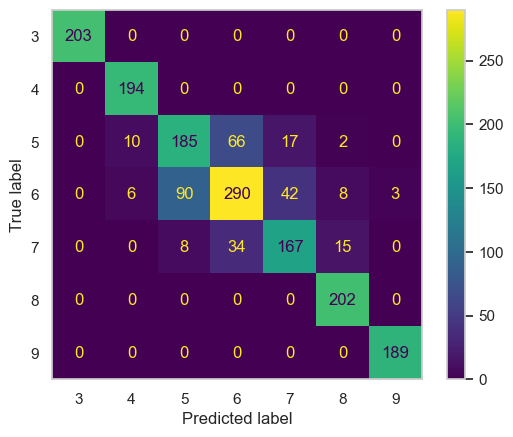

Accuracy of Decision Tree on  white4  training is:  1.0
Accuracy of Decision Tree on  white4  test data is:  0.8209127671865973


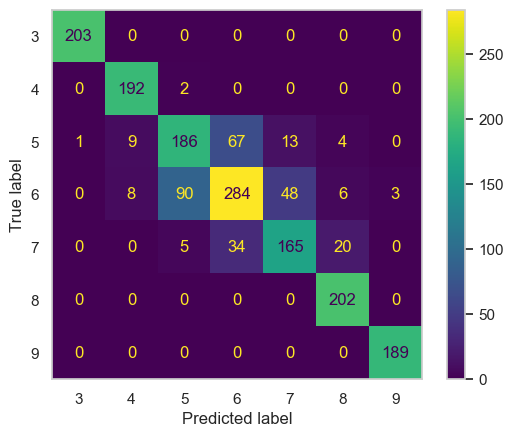

Accuracy of Decision Tree on  white5  training is:  1.0
Accuracy of Decision Tree on  white5  test data is:  0.8191796649335644


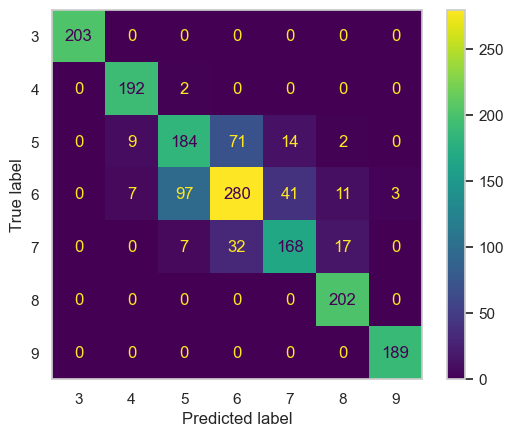

[0.8197573656845754, 0.8232235701906413, 0.8261120739456961, 0.8209127671865973, 0.8191796649335644]


0.8218370883882148

In [68]:
baltrain('white',5)

Performance is significantly improved by making data less skewed!  
Should we try to now downsample the overrepresented classes so all classes have equal probability?  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


<Axes: xlabel='quality', ylabel='count'>

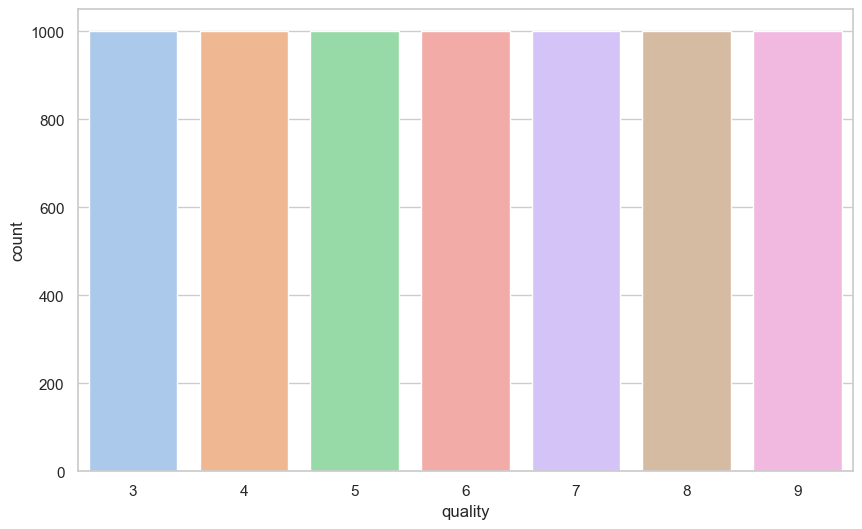

In [519]:
perfectbalwhite = whitewinedataraw.copy()

class3 = perfectbalwhite.loc[(perfectbalwhite['quality']==3)] #Underrepresented 
class4 = perfectbalwhite.loc[(perfectbalwhite['quality']==4)] #Underrepresented           
class5 = perfectbalwhite.loc[(perfectbalwhite['quality']==5)] #Overrepresented   
class6 = perfectbalwhite.loc[(perfectbalwhite['quality']==6)] #Overrepresented
class7 = perfectbalwhite.loc[(perfectbalwhite['quality']==7)] #Underrepresented     
class8 = perfectbalwhite.loc[(perfectbalwhite['quality']==8)] #Underrepresented    
class9 = perfectbalwhite.loc[(perfectbalwhite['quality']==9)] #Underrepresented   


class3_up = resample(class3, replace=True, n_samples=1000, random_state=10) 
class4_up = resample(class4, replace=True, n_samples=1000, random_state=10) 
class5_down = pd.DataFrame(class5).sample(n=1000).reset_index(drop=True)
class6_down = pd.DataFrame(class6).sample(n=1000).reset_index(drop=True)
class7_up = resample(class7, replace=True, n_samples=1000, random_state=10) 
class8_up = resample(class8, replace=True, n_samples=1000, random_state=10) 
class9_up = resample(class9, replace=True, n_samples=1000, random_state=10)

# Combine downsampled majority class with upsampled minority class
perfectbalwhite = pd.concat([class3_up, class4_up, class5_down, class6_down, class7_up, class8_up, class9_up]).reset_index(drop=True) 

display(balwhite)

#Show a histogram of the distribution of label data
plt.figure(figsize=(10,6))
sb.countplot(x='quality', data=perfectbalwhite, order=[3, 4, 5, 6, 7, 8, 9], palette='pastel')

In [520]:
#pop labels
perfectwhitelabels = perfectbalwhite.pop('quality')

In [521]:
#Now lets train and evaluate with less skewed labels:
def perfectbaltrain(winetype,iters): 
    accuracies=[]
    if winetype == 'white':
        data = perfectbalwhite
        labels = perfectwhitelabels
    else:
        data = redwinedata
        labels = redwinelabels
        
    for iterations in range (iters):
        accuracies.append(trainandeval(data, labels, winetype+str(iterations+1)))
    print(accuracies)
    return sum(accuracies)/iters
        

Accuracy of Decision Tree on  white1  training is:  1.0
Accuracy of Decision Tree on  white1  test data is:  0.8428571428571429


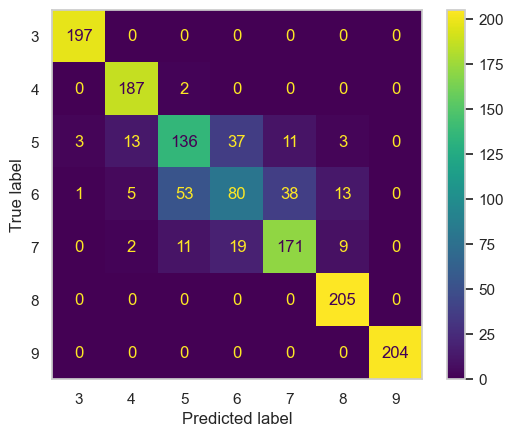

Accuracy of Decision Tree on  white2  training is:  1.0
Accuracy of Decision Tree on  white2  test data is:  0.8421428571428572


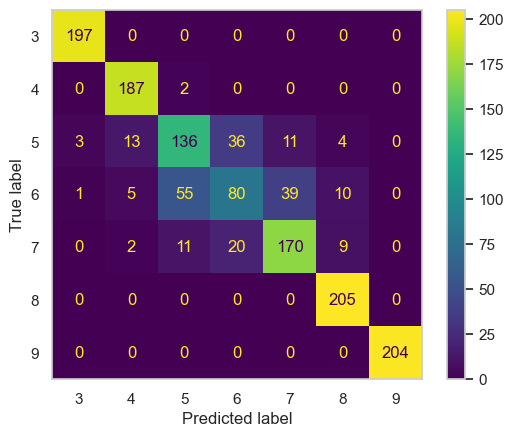

Accuracy of Decision Tree on  white3  training is:  1.0
Accuracy of Decision Tree on  white3  test data is:  0.8435714285714285


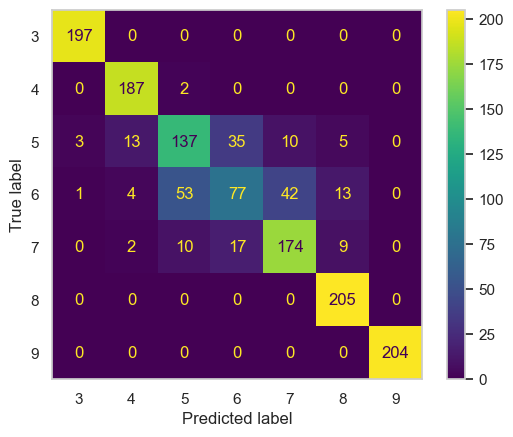

Accuracy of Decision Tree on  white4  training is:  1.0
Accuracy of Decision Tree on  white4  test data is:  0.8421428571428572


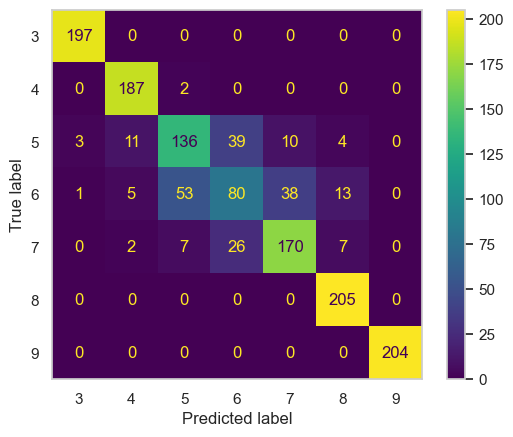

Accuracy of Decision Tree on  white5  training is:  1.0
Accuracy of Decision Tree on  white5  test data is:  0.8435714285714285


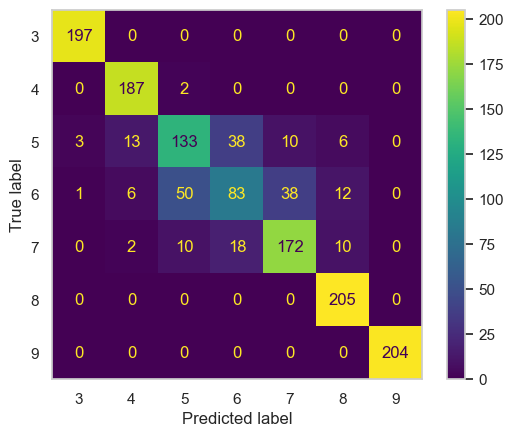

[0.8428571428571429, 0.8421428571428572, 0.8435714285714285, 0.8421428571428572, 0.8435714285714285]


0.8428571428571429

In [522]:
perfectbaltrain('white',5)

This actually causes a pretty significant problem.  We are skewing our evaluation with duplicated data from training leaking into our testing from the resampling to make more of the same data. While performance looks great, the scores are not reflective of the model's true ability to predict wine quality! Lets fix this by only adding those resampled values into our TRAIN data.  


In [523]:
#Redefining our training and evaluation so we can make use of the "better data" ONLY for training, but not for testing

#Uses train_test_split for model evals and use to shuffle our data and randomize what gets parsed to test and train
def baltraineval(winedata, winelabels, winetype):
    X_train, X_test, y_train, y_test = train_test_split(winedata, winelabels, train_size=.8, shuffle=True,random_state=0)

    X_train.head(5)
    
    temptrain = X_train
    temptrain['quality'] = y_train
    
    temptrain = baldataset(temptrain, winetype, False)
    
    y_train = temptrain.pop('quality')
    X_train = temptrain
        
    #X_train.info()
    #X_train.head(5)
    #y_train.head(5)
    #X_test.head(5)
    #y_test.head(5)

    dtclass = tree.DecisionTreeClassifier()
    dtclass = dtclass.fit(X_train, y_train)

    trainpred = dtclass.predict(X_train)
    testpred = dtclass.predict(X_test)

    trainacc = accuracy_score(trainpred, y_train)
    testacc = accuracy_score(testpred, y_test)

    print("Accuracy of Decision Tree on ", winetype, " training is: ", trainacc)
    print("Accuracy of Decision Tree on ", winetype, " test data is: ", testacc)
    
    winematrix = cm(y_test, testpred)
    labels = np.unique(np.concatenate((y_test,testpred),0))
        
    disp = showMatrix(winematrix, display_labels=labels) 
    disp.plot()  
    plt.grid(False)
    plt.show()
    
    return testacc

In [524]:
#Now lets train and evaluate with less skewed labels:
def perfectbaltrain2(winetype,iters): 
    accuracies=[]
    if winetype == 'white':
        data = whitewinedataraw.copy()
        
        labels = data.pop('quality')
    else:
        data = redwinedata
        labels = redwinelabels
        
    for iterations in range (iters):
        accuracies.append(baltraineval(data, labels, winetype+str(iterations+1)))
    print(accuracies)
    return sum(accuracies)/iters

Accuracy of Decision Tree on  white1  training is:  1.0
Accuracy of Decision Tree on  white1  test data is:  0.55


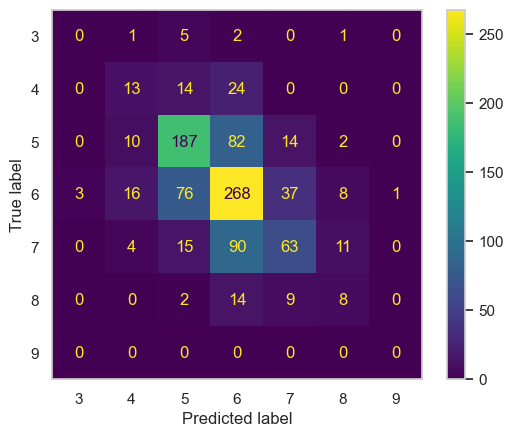

Accuracy of Decision Tree on  white2  training is:  1.0
Accuracy of Decision Tree on  white2  test data is:  0.5438775510204081


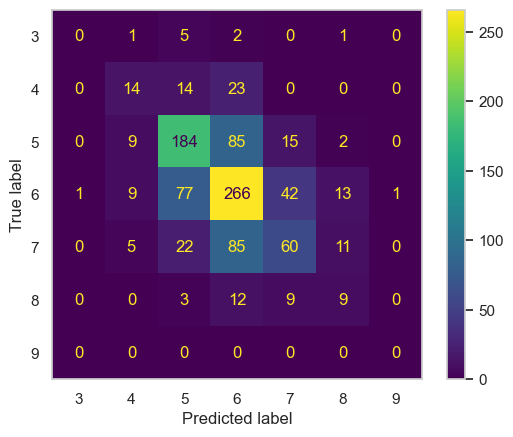

Accuracy of Decision Tree on  white3  training is:  1.0
Accuracy of Decision Tree on  white3  test data is:  0.5408163265306123


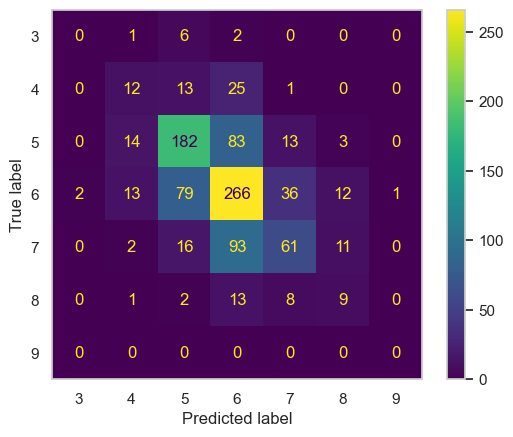

Accuracy of Decision Tree on  white4  training is:  1.0
Accuracy of Decision Tree on  white4  test data is:  0.5540816326530612


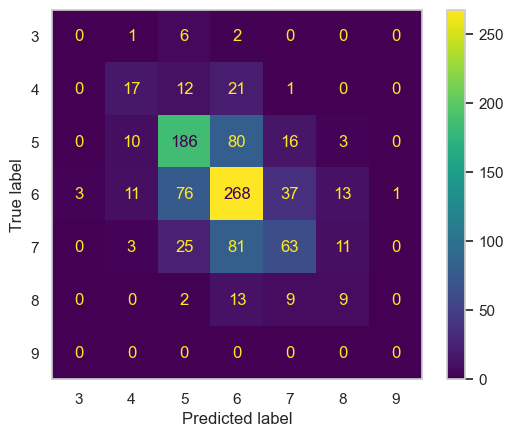

Accuracy of Decision Tree on  white5  training is:  1.0
Accuracy of Decision Tree on  white5  test data is:  0.5551020408163265


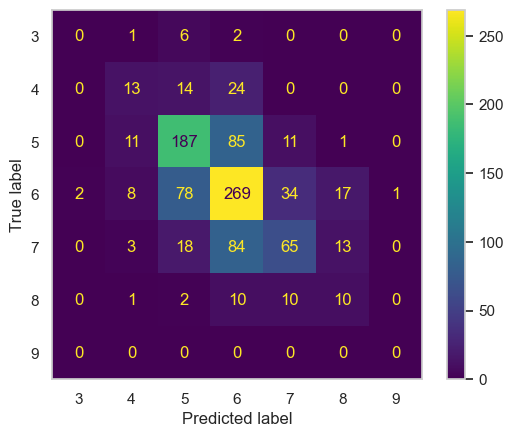

[0.55, 0.5438775510204081, 0.5408163265306123, 0.5540816326530612, 0.5551020408163265]


0.5487755102040817

In [525]:
perfectbaltrain2('white', 5)

Well, after only training on the resampled data, we're pretty much back where we started, maybe even a little worse because our model is not doing as well as it was before we performed our resampling.  